In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### 1.COVID19_Pneumonia_Normal_Chest_Xray

In [ ]:
%cd '/content'
# !git clone https://github.com/ricardotran92/COVID19_Pneumonia_Normal_Chest_Xray_PA_Median.git
# !git clone https://github.com/ricardotran92/COVID19_Pneumonia_Normal_Chest_Xray_PA.git
# !git clone https://github.com/ricardotran92/COVID19_Pneumonia_Normal_Chest_Xray_PA_CLAHE_Butterworth.git
# !git clone https://github.com/ALong202/COVID19_Pneumonia_Normal_Chest_Xray_PA_DWT2.git
# !git clone https://github.com/ricardotran92/COVID19_Pneumonia_Normal_Chest_Xray_PA_CLAHE_medianF3x3_jpg.git
# !git clone https://github.com/ricardotran92/COVID19_Pneumonia_Normal_Chest_Xray_PA_Median.git
!git clone https://github.com/ALong202/COVID19_Pneumonia_Normal_Chest_Xray_PA_USM3.git

/content
Cloning into 'COVID19_Pneumonia_Normal_Chest_Xray_PA_USM3'...
remote: Enumerating objects: 6803, done.
remote: Total 6803 (delta 0), reused 0 (delta 0), pack-reused 6803 (from 1)
Receiving objects: 100% (6803/6803), 958.51 MiB | 24.37 MiB/s, done.
Updating files: 100% (7000/7000), done.


In [ ]:
# %cd '/content/COVID19_Pneumonia_Normal_Chest_Xray_PA_Median'
# %cd '/content/COVID19_Pneumonia_Normal_Chest_Xray_PA'
# %cd '/content/COVID19_Pneumonia_Normal_Chest_Xray_PA_CLAHE_Butterworth'
# %cd '/content/COVID19_Pneumonia_Normal_Chest_Xray_PA_DWT2'
# %cd '/content/COVID19_Pneumonia_Normal_Chest_Xray_PA_CLAHE_medianF3x3_jpg'
# %cd '/content/COVID19_Pneumonia_Normal_Chest_Xray_PA_Median'
%cd '/content/COVID19_Pneumonia_Normal_Chest_Xray_PA_USM3'

/content/COVID19_Pneumonia_Normal_Chest_Xray_PA_USM3


In [ ]:
# dataset_path = '/content/COVID19_Pneumonia_Normal_Chest_Xray_PA_Median/dataset'
# dataset_path = '/content/COVID19_Pneumonia_Normal_Chest_Xray_PA/dataset'
# dataset_path = '/content/COVID19_Pneumonia_Normal_Chest_Xray_PA_CLAHE_Butterworth/dataset'
# dataset_path = '/content/COVID19_Pneumonia_Normal_Chest_Xray_PA_DWT2/dataset'
# dataset_path = '/content/COVID19_Pneumonia_Normal_Chest_Xray_PA_CLAHE_medianF3x3_jpg/dataset'
# dataset_path = '/content/COVID19_Pneumonia_Normal_Chest_Xray_PA_Median/dataset'
dataset_path = '/content/COVID19_Pneumonia_Normal_Chest_Xray_PA_USM3/dataset'

#### Load dataset

In [ ]:
# Convert strange format supported format with Tensorflow (JPEG, PNG, BMP, GIF)
from PIL import Image
import os

# dataset_path = 'path_to_your_dataset'

for foldername in os.listdir(dataset_path):
    folder_path = os.path.join(dataset_path, foldername)
    for filename in os.listdir(folder_path):
        if filename.endswith(('.jfif', '.tiff', '.tif')):
            print(f"Reformatting {filename} to JPG format...")
            img = Image.open(os.path.join(folder_path, filename))
            # Remove the extension from the filename
            base_filename = os.path.splitext(filename)[0]
            img.save(os.path.join(folder_path, base_filename + '.jpg'))
            print(f"Reformatted {filename} to JPG format.")

In [ ]:
# Load image with image_dataset_from_directory
import tensorflow as tf
from tensorflow.keras.preprocessing import image_dataset_from_directory

# Define the parameters: image size, colors
image_size = (224,224)
batch_size=32
color_mode = 'rgb'
label_mode = "categorical"
class_names = sorted(os.listdir(dataset_path))
print("Class names:", class_names)

# Load the dataset
train_dataset = image_dataset_from_directory(
    directory= dataset_path,
    labels="inferred",
    label_mode=label_mode,
    class_names=class_names,
    color_mode=color_mode,
    batch_size=batch_size,
    image_size=image_size,
    # shuffle=True,
    seed=42,
    validation_split=0.2,
    subset="training",
    interpolation="bilinear",
    # follow_links=False,
    # crop_to_aspect_ratio=False,
    # data_format=None,
)

# Load the dataset
test_dataset = image_dataset_from_directory(
    directory= dataset_path,
    labels="inferred",
    label_mode=label_mode,
    # class_names=None,
    color_mode=color_mode,
    batch_size=batch_size,
    image_size=image_size,
    # shuffle=True,
    seed=42,
    validation_split=0.2,
    subset="validation",
    interpolation="bilinear",
    # follow_links=False,
    # crop_to_aspect_ratio=False,
    # data_format=None,
)

# Get the class names
# class_names = train_dataset.class_names
num_classes = len(class_names)

print("Class names:", train_dataset.class_names)
print("Number of classes: ", num_classes)

Class names: ['covid', 'normal', 'pneumonia']
Found 6939 files belonging to 3 classes.
Using 5552 files for training.
Found 6939 files belonging to 3 classes.
Using 1387 files for validation.
Class names: ['covid', 'normal', 'pneumonia']
Number of classes:  3


#### Copy the test_dataset into a independent folder

In [ ]:
import shutil
import os

# Define a new directory to store the images
# new_directory = '/content/drive/MyDrive/Colab Notebooks/Thesis/Analysis/test_dataset' + '/' + os.path.basename(os.path.dirname(dataset_path))
# new_directory = '/content/drive/MyDrive/Colab Notebooks/Thesis/Analysis/test_dataset_origin' + '/' + os.path.basename(os.path.dirname(dataset_path))
# new_directory = '/content/drive/MyDrive/Colab Notebooks/Thesis/Analysis/test_dataset/01_00'
# new_directory = '/content/drive/MyDrive/Colab Notebooks/Thesis/Analysis/test_dataset/01_02'
# new_directory = '/content/drive/MyDrive/Colab Notebooks/Thesis/Analysis/test_dataset/01_03'
# new_directory = '/content/drive/MyDrive/Colab Notebooks/Thesis/Analysis/test_dataset/01_04'
# new_directory = '/content/drive/MyDrive/Colab Notebooks/Thesis/Analysis/test_dataset/01_07'
new_directory = '/content/drive/MyDrive/Colab Notebooks/Thesis/Analysis/test_dataset/01_08'

print('new_directory:' + new_directory)

# Create the new directory if it doesn't exist
if not os.path.exists(new_directory):
    os.makedirs(new_directory)

# Get the file paths from the original test_dataset
file_paths = test_dataset.file_paths

# Copy the images to the new directory
for file_path in file_paths:
    # Get the class name and image name from the file path
    class_name = os.path.basename(os.path.dirname(file_path))
    image_name = os.path.basename(file_path)

    # Create a new directory for the class if it doesn't exist
    class_directory = os.path.join(new_directory, class_name)
    if not os.path.exists(class_directory):
        os.makedirs(class_directory)

    # Copy the image to the new directory
    shutil.copy(file_path, os.path.join(class_directory, image_name))


new_directory:/content/drive/MyDrive/Colab Notebooks/Thesis/Analysis/test_dataset/01/01_08


In [ ]:
# Load the dataset from new independent test_dataset folder
test_dataset = image_dataset_from_directory(
    directory= new_directory,
    labels="inferred",
    label_mode=label_mode,
    class_names=class_names,
    color_mode=color_mode,
    batch_size=batch_size,
    image_size=image_size,
    shuffle=False,
    seed=42,
    # validation_split=0.2,
    # subset="validation",
    interpolation="bilinear",
    # follow_links=False,
    # crop_to_aspect_ratio=False,
    # data_format=None,
)

# Get the class names
# class_names = train_dataset.class_names
num_classes = len(class_names)

print("Class names:", test_dataset.class_names)
print("Number of classes: ", num_classes)

Found 1387 files belonging to 3 classes.
Class names: ['covid', 'normal', 'pneumonia']
Number of classes:  3


### 4.Brain-Tumor-MRI_Median-Mean-Hybrid_Filter

In [ ]:
%cd '/content'
# !git clone https://github.com/ricardotran92/Brain-Tumor-MRI_Median-Mean-Hybrid_Filter.git
# !git clone https://github.com/ricardotran92/Brain-Tumor-MRI-Dataset.git
# !git clone https://github.com/ricardotran92/Brain-Tumor-MRI_CLAHE_Butterworth.git
# !git clone https://github.com/ricardotran92/Brain-Tumor-MRI_DWT.git
# !git clone https://github.com/ricardotran92/Brain-Tumor-MRI_CLAHE_medianF3x3.git
# !git clone https://github.com/ricardotran92/Brain-Tumor-MRI_Median-Mean-Hybrid_Filter.git
!git clone https://github.com/ricardotran92/Brain-Tumor-MRI_Unsharp-Masking_Bilateral_Filter.git

/content
Cloning into 'Brain-Tumor-MRI_Unsharp-Masking_Bilateral_Filter'...
remote: Enumerating objects: 6622, done.
remote: Total 6622 (delta 0), reused 0 (delta 0), pack-reused 6622 (from 1)
Receiving objects: 100% (6622/6622), 248.55 MiB | 23.76 MiB/s, done.
Resolving deltas: 100% (4/4), done.
Updating files: 100% (7184/7184), done.


In [ ]:
# %cd '/content/Brain-Tumor-MRI_Median-Mean-Hybrid_Filter'
# %cd '/content/Brain-Tumor-MRI-Dataset'
# %cd '/content/Brain-Tumor-MRI_CLAHE_Butterworth'
# %cd '/content/Brain-Tumor-MRI_DWT'
# %cd '/content/Brain-Tumor-MRI_CLAHE_medianF3x3'
# %cd '/content/Brain-Tumor-MRI_Median-Mean-Hybrid_Filter'
%cd '/content/Brain-Tumor-MRI_Unsharp-Masking_Bilateral_Filter'

/content/Brain-Tumor-MRI_Unsharp-Masking_Bilateral_Filter


In [ ]:
# dataset_path = '/content/Brain-Tumor-MRI_Median-Mean-Hybrid_Filter/dataset'
# dataset_path = '/content/Brain-Tumor-MRI-Dataset/dataset'
# dataset_path = '/content/Brain-Tumor-MRI_CLAHE_Butterworth/dataset'
# dataset_path = '/content/Brain-Tumor-MRI_DWT/dataset'
# dataset_path = '/content/Brain-Tumor-MRI_CLAHE_medianF3x3/dataset'
# dataset_path = '/content/Brain-Tumor-MRI_Median-Mean-Hybrid_Filter/dataset'
dataset_path = '/content/Brain-Tumor-MRI_Unsharp-Masking_Bilateral_Filter/dataset'

#### Load dataset

In [ ]:
# Convert strange format supported format with Tensorflow (JPEG, PNG, BMP, GIF)
from PIL import Image
import os

# dataset_path = 'path_to_your_dataset'

for foldername in os.listdir(dataset_path):
    folder_path = os.path.join(dataset_path, foldername)
    for filename in os.listdir(folder_path):
        if filename.endswith(('.jfif', '.tiff', '.tif')):
            print(f"Reformatting {filename} to JPG format...")
            img = Image.open(os.path.join(folder_path, filename))
            # Remove the extension from the filename
            base_filename = os.path.splitext(filename)[0]
            img.save(os.path.join(folder_path, base_filename + '.jpg'))
            print(f"Reformatted {filename} to JPG format.")

In [ ]:
# Load image with image_dataset_from_directory
import tensorflow as tf
from tensorflow.keras.preprocessing import image_dataset_from_directory

# Define the parameters: image size, colors
image_size = (380,380)
batch_size=32
color_mode = 'rgb'
label_mode = "categorical"

# Load the dataset
train_dataset = image_dataset_from_directory(
    directory= dataset_path + '/Training',
    labels="inferred",
    label_mode=label_mode,
    # class_names=None,
    color_mode=color_mode,
    batch_size=batch_size,
    image_size=image_size,
    # shuffle=True,
    seed=42,
    # validation_split=0.2,
    # subset="training",
    interpolation="bilinear",
    # follow_links=False,
    # crop_to_aspect_ratio=False,
    # data_format=None,
)

# Load the dataset
test_dataset = image_dataset_from_directory(
    directory= dataset_path + '/Testing',
    labels="inferred",
    label_mode=label_mode,
    # class_names=None,
    color_mode=color_mode,
    batch_size=batch_size,
    image_size=image_size,
    # shuffle=True,
    seed=42,
    # validation_split=0.2,
    # subset="validation",
    interpolation="bilinear",
    # follow_links=False,
    # crop_to_aspect_ratio=False,
    # data_format=None,
)

# Get the class names
class_names = test_dataset.class_names
num_classes = len(class_names)

print("Class names: ", class_names)
print("Number of classes: ", num_classes)

Found 5712 files belonging to 4 classes.
Found 1311 files belonging to 4 classes.
Class names:  ['glioma', 'meningioma', 'notumor', 'pituitary']
Number of classes:  4


#### Copy the test_dataset into a independent folder

In [ ]:
import shutil
import os

# Define a new directory to store the images
# new_directory = '/content/drive/MyDrive/Colab Notebooks/Thesis/Analysis/test_dataset' + '/' + os.path.basename(os.path.dirname(dataset_path))
# new_directory = '/content/drive/MyDrive/Colab Notebooks/Thesis/Analysis/test_dataset_origin' + '/' + os.path.basename(os.path.dirname(dataset_path))
# new_directory = '/content/drive/MyDrive/Colab Notebooks/Thesis/Analysis/test_dataset/04_00'
# new_directory = '/content/drive/MyDrive/Colab Notebooks/Thesis/Analysis/test_dataset/04_02'
# new_directory = '/content/drive/MyDrive/Colab Notebooks/Thesis/Analysis/test_dataset/04_03'
# new_directory = '/content/drive/MyDrive/Colab Notebooks/Thesis/Analysis/test_dataset/04_04'
# new_directory = '/content/drive/MyDrive/Colab Notebooks/Thesis/Analysis/test_dataset/04_07'
new_directory = '/content/drive/MyDrive/Colab Notebooks/Thesis/Analysis/test_dataset/04_08'



print('new_directory:' + new_directory)

# Create the new directory if it doesn't exist
if not os.path.exists(new_directory):
    os.makedirs(new_directory)

# Get the file paths from the original test_dataset
file_paths = test_dataset.file_paths

# Copy the images to the new directory
for file_path in file_paths:
    # Get the class name and image name from the file path
    class_name = os.path.basename(os.path.dirname(file_path))
    image_name = os.path.basename(file_path)

    # Create a new directory for the class if it doesn't exist
    class_directory = os.path.join(new_directory, class_name)
    if not os.path.exists(class_directory):
        os.makedirs(class_directory)

    # Copy the image to the new directory
    shutil.copy(file_path, os.path.join(class_directory, image_name))


new_directory:/content/drive/MyDrive/Colab Notebooks/Thesis/Analysis/test_dataset/04_08


In [ ]:
# Load the dataset from new independent test_dataset folder
test_dataset = image_dataset_from_directory(
    directory= new_directory,
    labels="inferred",
    label_mode=label_mode,
    class_names=class_names,
    color_mode=color_mode,
    batch_size=batch_size,
    image_size=image_size,
    shuffle=False,
    seed=42,
    # validation_split=0.2,
    # subset="validation",
    interpolation="bilinear",
    # follow_links=False,
    # crop_to_aspect_ratio=False,
    # data_format=None,
)

# Get the class names
# class_names = train_dataset.class_names
num_classes = len(class_names)

print("Class names:", test_dataset.class_names)
print("Number of classes: ", num_classes)

Found 1311 files belonging to 4 classes.
Class names: ['glioma', 'meningioma', 'notumor', 'pituitary']
Number of classes:  4


### 3.Chest-CT-Scan-images_DWT

In [ ]:
%cd '/content'
# !git clone https://github.com/ricardotran92/Chest-CT-Scan-images_DWT.git
# !git clone https://github.com/ricardotran92/Chest-CT-Scan-images-Dataset.git
# !git clone https://github.com/ricardotran92/Chest-CT-Scan-images_CLAHE_Butterworth.git
# !git clone https://github.com/ricardotran92/Chest-CT-Scan-images_DWT.git
# !git clone https://github.com/ricardotran92/Chest-CT-Scan-images_CLAHE_medianF3x3.git
# !git clone https://github.com/ricardotran92/Chest-CT-Scan-images_Median-Mean-Hybrid-Filter.git
!git clone https://github.com/ricardotran92/Chest-CT-Scan-images_unsharpMasking_bilateralfilter.git

/content
Cloning into 'Chest-CT-Scan-images_unsharpMasking_bilateralfilter'...
remote: Enumerating objects: 879, done.
remote: Total 879 (delta 0), reused 0 (delta 0), pack-reused 879 (from 1)
Receiving objects: 100% (879/879), 83.53 MiB | 17.78 MiB/s, done.
Resolving deltas: 100% (11/11), done.
Updating files: 100% (1229/1229), done.


In [ ]:
# %cd '/content/Chest-CT-Scan-images_DWT'
# %cd '/content/Chest-CT-Scan-images-Dataset'
# %cd '/content/Chest-CT-Scan-images_CLAHE_Butterworth'
# %cd '/content/Chest-CT-Scan-images_DWT'
# %cd '/content/Chest-CT-Scan-images_CLAHE_medianF3x3'
# %cd '/content/Chest-CT-Scan-images_Median-Mean-Hybrid-Filter'
%cd '/content/Chest-CT-Scan-images_unsharpMasking_bilateralfilter'

/content/Chest-CT-Scan-images_unsharpMasking_bilateralfilter


In [ ]:
# dataset_path = '/content/Chest-CT-Scan-images_DWT/dataset'
# dataset_path = '/content/Chest-CT-Scan-images-Dataset/dataset'
# dataset_path = '/content/Chest-CT-Scan-images_CLAHE_Butterworth/dataset'
# dataset_path = '/content/Chest-CT-Scan-images_DWT/dataset'
# dataset_path = '/content/Chest-CT-Scan-images_CLAHE_medianF3x3/dataset'
# dataset_path = '/content/Chest-CT-Scan-images_Median-Mean-Hybrid-Filter/dataset'
dataset_path = '/content/Chest-CT-Scan-images_unsharpMasking_bilateralfilter/dataset'

#### Load dataset

In [ ]:
# Convert strange format supported format with Tensorflow (JPEG, PNG, BMP, GIF)
from PIL import Image
import os

# dataset_path = 'path_to_your_dataset'

for foldername in os.listdir(dataset_path):
    folder_path = os.path.join(dataset_path, foldername)
    for filename in os.listdir(folder_path):
        if filename.endswith(('.jfif', '.tiff', '.tif')):
            print(f"Reformatting {filename} to JPG format...")
            img = Image.open(os.path.join(folder_path, filename))
            # Remove the extension from the filename
            base_filename = os.path.splitext(filename)[0]
            img.save(os.path.join(folder_path, base_filename + '.jpg'))
            print(f"Reformatted {filename} to JPG format.")

In [ ]:
# Load image with image_dataset_from_directory
import tensorflow as tf
from tensorflow.keras.preprocessing import image_dataset_from_directory

# Define the parameters: image size, colors
image_size = (380,380)
batch_size=32
color_mode = 'rgb'
label_mode = "categorical"

# Load the train dataset
train_dataset = image_dataset_from_directory(
    directory= dataset_path + '/train',
    labels="inferred",
    label_mode=label_mode,
    # class_names=None,
    color_mode=color_mode,
    batch_size=batch_size,
    image_size=image_size,
    # shuffle=True,
    seed=42,
    # validation_split=0.2,
    # subset="training",
    interpolation="bilinear",
    # follow_links=False,
    # crop_to_aspect_ratio=False,
    # data_format=None,
)

# Load the valid dataset
val_dataset = image_dataset_from_directory(
    directory= dataset_path + '/valid',
    labels="inferred",
    label_mode=label_mode,
    # class_names=None,
    color_mode=color_mode,
    batch_size=batch_size,
    image_size=image_size,
    # shuffle=True,
    seed=42,
    # validation_split=0.2,
    # subset="validation",
    interpolation="bilinear",
    # follow_links=False,
    # crop_to_aspect_ratio=False,
    # data_format=None,
)

# Load the test dataset
test_dataset = image_dataset_from_directory(
    directory= dataset_path + '/test',
    labels="inferred",
    label_mode=label_mode,
    # class_names=None,
    color_mode=color_mode,
    batch_size=batch_size,
    image_size=image_size,
    # shuffle=True,
    seed=42,
    # validation_split=0.2,
    # subset="validation",
    interpolation="bilinear",
    # follow_links=False,
    # crop_to_aspect_ratio=False,
    # data_format=None,
)

# Get the class names
class_names = train_dataset.class_names
num_classes = len(class_names)

print("Class names: ", class_names)
print("Number of classes: ", num_classes)

Found 613 files belonging to 4 classes.
Found 72 files belonging to 4 classes.
Found 315 files belonging to 4 classes.
Class names:  ['adenocarcinoma_left.lower.lobe_T2_N0_M0_Ib', 'large.cell.carcinoma_left.hilum_T2_N2_M0_IIIa', 'normal', 'squamous.cell.carcinoma_left.hilum_T1_N2_M0_IIIa']
Number of classes:  4


#### Copy the test_dataset into a independent folder

In [ ]:
import shutil
import os

# Define a new directory to store the images
# new_directory = '/content/drive/MyDrive/Colab Notebooks/Thesis/Analysis/test_dataset' + '/' + os.path.basename(os.path.dirname(dataset_path))
# new_directory = '/content/drive/MyDrive/Colab Notebooks/Thesis/Analysis/test_dataset_origin' + '/' + os.path.basename(os.path.dirname(dataset_path))
# new_directory = '/content/drive/MyDrive/Colab Notebooks/Thesis/Analysis/test_dataset/03_00'
# new_directory = '/content/drive/MyDrive/Colab Notebooks/Thesis/Analysis/test_dataset/03_02'
# new_directory = '/content/drive/MyDrive/Colab Notebooks/Thesis/Analysis/test_dataset/03_03'
# new_directory = '/content/drive/MyDrive/Colab Notebooks/Thesis/Analysis/test_dataset/03_04'
# new_directory = '/content/drive/MyDrive/Colab Notebooks/Thesis/Analysis/test_dataset/03_07'
new_directory = '/content/drive/MyDrive/Colab Notebooks/Thesis/Analysis/test_dataset/03_08'

print('new_directory:' + new_directory)

# Create the new directory if it doesn't exist
if not os.path.exists(new_directory):
    os.makedirs(new_directory)

# Get the file paths from the original test_dataset
file_paths = test_dataset.file_paths

# Copy the images to the new directory
for file_path in file_paths:
    # Get the class name and image name from the file path
    class_name = os.path.basename(os.path.dirname(file_path))
    image_name = os.path.basename(file_path)

    # Create a new directory for the class if it doesn't exist
    class_directory = os.path.join(new_directory, class_name)
    if not os.path.exists(class_directory):
        os.makedirs(class_directory)

    # Copy the image to the new directory
    shutil.copy(file_path, os.path.join(class_directory, image_name))


new_directory:/content/drive/MyDrive/Colab Notebooks/Thesis/Analysis/test_dataset/03_08


In [ ]:
# Load the dataset from new independent test_dataset folder
test_dataset = image_dataset_from_directory(
    directory= new_directory,
    labels="inferred",
    label_mode=label_mode,
    # class_names=class_names,
    color_mode=color_mode,
    batch_size=batch_size,
    image_size=image_size,
    shuffle=False,
    seed=42,
    # validation_split=0.2,
    # subset="validation",
    interpolation="bilinear",
    # follow_links=False,
    # crop_to_aspect_ratio=False,
    # data_format=None,
)

# Get the class names
# class_names = train_dataset.class_names
num_classes = len(class_names)

print("Class names:", test_dataset.class_names)
print("Number of classes: ", num_classes)

Found 315 files belonging to 5 classes.
Class names: ['adenocarcinoma_left.lower.lobe_T2_N0_M0_Ib', 'large.cell.carcinoma_left.hilum_T2_N2_M0_IIIa', 'normal', 'squamous.cell.carcinoma', 'squamous.cell.carcinoma_left.hilum_T1_N2_M0_IIIa']
Number of classes:  4


### 5.Ultrasound-Breast-Images-for-Breast-Cancer_unsharpMasking_bilateralfilter

In [ ]:
%cd '/content'
# !git clone https://github.com/ricardotran92/Ultrasound-Breast-Images-for-Breast-Cancer_unsharpMasking_bilateralfilter.git
# !git clone https://github.com/ricardotran92/Ultrasound-Breast-Images-for-Breast-Cancer.git
# !git clone https://github.com/ricardotran92/Ultrasound-Breast-Images-for-Breast-Cancer_CLAHE_Butterworth.git
# !git clone https://github.com/ricardotran92/Ultrasound-Breast-Images-for-Breast-Cancer_DWT.git
# !git clone https://github.com/ricardotran92/Ultrasound-Breast-Images-for-Breast-Cancer_CLAHE_medianF3x3.git
# !git clone https://github.com/ricardotran92/Ultrasound-Breast-Images-for-Breast-Cancer_Median-Mean-Hybrid-Filter.git
!git clone https://github.com/ricardotran92/Ultrasound-Breast-Images-for-Breast-Cancer_unsharpMasking_bilateralfilter.git

/content
Cloning into 'Ultrasound-Breast-Images-for-Breast-Cancer_unsharpMasking_bilateralfilter'...
remote: Enumerating objects: 8797, done.
remote: Total 8797 (delta 0), reused 0 (delta 0), pack-reused 8797 (from 1)
Receiving objects: 100% (8797/8797), 494.12 MiB | 25.42 MiB/s, done.
Resolving deltas: 100% (2/2), done.
Updating files: 100% (9097/9097), done.


In [ ]:
# %cd '/content/Ultrasound-Breast-Images-for-Breast-Cancer_unsharpMasking_bilateralfilter'
# %cd '/content/Ultrasound-Breast-Images-for-Breast-Cancer'
# %cd '/content/Ultrasound-Breast-Images-for-Breast-Cancer_CLAHE_Butterworth'
# %cd '/content/Ultrasound-Breast-Images-for-Breast-Cancer_DWT'
# %cd '/content/Ultrasound-Breast-Images-for-Breast-Cancer_CLAHE_medianF3x3'
# %cd '/content/Ultrasound-Breast-Images-for-Breast-Cancer_Median-Mean-Hybrid-Filter'
%cd '/content/Ultrasound-Breast-Images-for-Breast-Cancer_unsharpMasking_bilateralfilter'

/content/Ultrasound-Breast-Images-for-Breast-Cancer_unsharpMasking_bilateralfilter


In [ ]:
# dataset_path = '/content/Ultrasound-Breast-Images-for-Breast-Cancer_unsharpMasking_bilateralfilter/dataset'
# dataset_path = '/content/Ultrasound-Breast-Images-for-Breast-Cancer/dataset'
# dataset_path = '/content/Ultrasound-Breast-Images-for-Breast-Cancer_CLAHE_Butterworth/dataset'
# dataset_path = '/content/Ultrasound-Breast-Images-for-Breast-Cancer_DWT/dataset'
# dataset_path = '/content/Ultrasound-Breast-Images-for-Breast-Cancer_CLAHE_medianF3x3/dataset'
# dataset_path = '/content/Ultrasound-Breast-Images-for-Breast-Cancer_Median-Mean-Hybrid-Filter/dataset'
dataset_path = '/content/Ultrasound-Breast-Images-for-Breast-Cancer_unsharpMasking_bilateralfilter/dataset'

#### Load dataset

In [ ]:
# Convert strange format supported format with Tensorflow (JPEG, PNG, BMP, GIF)
from PIL import Image
import os

# dataset_path = 'path_to_your_dataset'

for foldername in os.listdir(dataset_path):
    folder_path = os.path.join(dataset_path, foldername)
    for filename in os.listdir(folder_path):
        if filename.endswith(('.jfif', '.tiff', '.tif')):
            print(f"Reformatting {filename} to JPG format...")
            img = Image.open(os.path.join(folder_path, filename))
            # Remove the extension from the filename
            base_filename = os.path.splitext(filename)[0]
            img.save(os.path.join(folder_path, base_filename + '.jpg'))
            print(f"Reformatted {filename} to JPG format.")

In [ ]:
# Load image with image_dataset_from_directory
import tensorflow as tf
from tensorflow.keras.preprocessing import image_dataset_from_directory

# Define the parameters: image size, colors
image_size = (380,380)
batch_size=32
color_mode = 'rgb'
label_mode = "binary"
class_names = sorted(os.listdir(dataset_path + '/train'))
print("Class names:", class_names)

# Load the train dataset
train_dataset = image_dataset_from_directory(
    directory= dataset_path + '/train',
    labels="inferred",
    label_mode=label_mode,
    class_names=class_names,
    color_mode=color_mode,
    batch_size=batch_size,
    image_size=image_size,
    # shuffle=True,
    seed=42,
    # validation_split=0.2,
    # subset="training",
    interpolation="bilinear",
    # follow_links=False,
    # crop_to_aspect_ratio=False,
    # data_format=None,
)

# Load the test dataset
val_dataset = image_dataset_from_directory(
    directory= dataset_path + '/val',
    labels="inferred",
    label_mode=label_mode,
    class_names=class_names,
    color_mode=color_mode,
    batch_size=batch_size,
    image_size=image_size,
    # shuffle=True,
    seed=42,
    # validation_split=0.2,
    # subset="validation",
    interpolation="bilinear",
    # follow_links=False,
    # crop_to_aspect_ratio=False,
    # data_format=None,
)

# Get the class names
# class_names = train_dataset.class_names
num_classes = len(class_names)

print("Class names:", train_dataset.class_names)
print("Number of classes: ", num_classes)

Class names: ['benign', 'malignant']
Found 8116 files belonging to 2 classes.
Found 900 files belonging to 2 classes.
Class names: ['benign', 'malignant']
Number of classes:  2


#### Copy the test_dataset into a independent folder

In [ ]:
import shutil
import os

# Define a new directory to store the images
# new_directory = '/content/drive/MyDrive/Colab Notebooks/Thesis/Analysis/test_dataset' + '/' + os.path.basename(os.path.dirname(dataset_path))
# new_directory = '/content/drive/MyDrive/Colab Notebooks/Thesis/Analysis/test_dataset_origin' + '/' + os.path.basename(os.path.dirname(dataset_path))
# new_directory = '/content/drive/MyDrive/Colab Notebooks/Thesis/Analysis/test_dataset/05_00'
# new_directory = '/content/drive/MyDrive/Colab Notebooks/Thesis/Analysis/test_dataset/05_02'
# new_directory = '/content/drive/MyDrive/Colab Notebooks/Thesis/Analysis/test_dataset/05_03'
# new_directory = '/content/drive/MyDrive/Colab Notebooks/Thesis/Analysis/test_dataset/05_04'
# new_directory = '/content/drive/MyDrive/Colab Notebooks/Thesis/Analysis/test_dataset/05_07'
new_directory = '/content/drive/MyDrive/Colab Notebooks/Thesis/Analysis/test_dataset/05_08'


print('new_directory:' + new_directory)

# Create the new directory if it doesn't exist
if not os.path.exists(new_directory):
    os.makedirs(new_directory)

# Get the file paths from the original test_dataset
file_paths = val_dataset.file_paths

# Copy the images to the new directory
for file_path in file_paths:
    # Get the class name and image name from the file path
    class_name = os.path.basename(os.path.dirname(file_path))
    image_name = os.path.basename(file_path)

    # Create a new directory for the class if it doesn't exist
    class_directory = os.path.join(new_directory, class_name)
    if not os.path.exists(class_directory):
        os.makedirs(class_directory)

    # Copy the image to the new directory
    shutil.copy(file_path, os.path.join(class_directory, image_name))


new_directory:/content/drive/MyDrive/Colab Notebooks/Thesis/Analysis/test_dataset/05_08


In [ ]:
# Load the dataset from new independent test_dataset folder
test_dataset = image_dataset_from_directory(
    directory= new_directory,
    labels="inferred",
    label_mode=label_mode,
    class_names=class_names,
    color_mode=color_mode,
    batch_size=batch_size,
    image_size=image_size,
    shuffle=False,
    seed=42,
    # validation_split=0.2,
    # subset="validation",
    interpolation="bilinear",
    # follow_links=False,
    # crop_to_aspect_ratio=False,
    # data_format=None,
)

# Get the class names
# class_names = train_dataset.class_names
num_classes = len(class_names)

print("Class names:", test_dataset.class_names)
print("Number of classes: ", num_classes)

Found 900 files belonging to 2 classes.
Class names: ['benign', 'malignant']
Number of classes:  2


### 2.Osteoporosis-Knee-Xray_unsharpMasking

In [ ]:
%cd '/content'
# !git clone https://github.com/ricardotran92/Osteoporosis-Knee-Xray_unsharpMasking.git
# !git clone https://github.com/ricardotran92/Osteoporosis-Knee-Xray-Dataset.git
# !git clone https://github.com/ricardotran92/Osteoporosis-Knee-Xray_CLAHE_Butterworth.git
# !git clone https://github.com/ricardotran92/Osteoporosis-Knee-Xray_DWT.git
# !git clone https://github.com/ricardotran92/Osteoporosis-Knee-Xray_CLAHE_medianF3x3.git
# !git clone https://github.com/ricardotran92/Osteoporosis-Knee-Xray_Median-Mean-Hybrid-Filter_5x5.git
!git clone https://github.com/ricardotran92/Osteoporosis-Knee-Xray_unsharpMasking.git

/content
Cloning into 'Osteoporosis-Knee-Xray_unsharpMasking'...
remote: Enumerating objects: 364, done.
remote: Total 364 (delta 0), reused 0 (delta 0), pack-reused 364 (from 1)
Receiving objects: 100% (364/364), 68.81 MiB | 22.27 MiB/s, done.
Resolving deltas: 100% (2/2), done.


In [ ]:
# %cd '/content/Osteoporosis-Knee-Xray_unsharpMasking'
# %cd '/content/Osteoporosis-Knee-Xray-Dataset'
# %cd '/content/Osteoporosis-Knee-Xray_CLAHE_Butterworth'
# %cd '/content/Osteoporosis-Knee-Xray_DWT'
# %cd '/content/Osteoporosis-Knee-Xray_CLAHE_medianF3x3'
# %cd '/content/Osteoporosis-Knee-Xray_Median-Mean-Hybrid-Filter_5x5'
%cd '/content/Osteoporosis-Knee-Xray_unsharpMasking'

/content/Osteoporosis-Knee-Xray_unsharpMasking


In [ ]:
# dataset_path = '/content/Osteoporosis-Knee-Xray_unsharpMasking/dataset'
# dataset_path = '/content/Osteoporosis-Knee-Xray-Dataset/dataset'
# dataset_path = '/content/Osteoporosis-Knee-Xray_CLAHE_Butterworth/dataset'
# dataset_path = '/content/Osteoporosis-Knee-Xray_DWT/dataset'
# dataset_path = '/content/Osteoporosis-Knee-Xray_CLAHE_medianF3x3/dataset'
# dataset_path = '/content/Osteoporosis-Knee-Xray_Median-Mean-Hybrid-Filter_5x5/dataset'
dataset_path = '/content/Osteoporosis-Knee-Xray_unsharpMasking/dataset'

#### Load dataset

In [ ]:
# Convert strange format supported format with Tensorflow (JPEG, PNG, BMP, GIF)
from PIL import Image
import os

# dataset_path = 'path_to_your_dataset'

for foldername in os.listdir(dataset_path):
    folder_path = os.path.join(dataset_path, foldername)
    for filename in os.listdir(folder_path):
        if filename.endswith(('.jfif', '.tiff', '.tif')):
            print(f"Reformatting {filename} to JPG format...")
            img = Image.open(os.path.join(folder_path, filename))
            # Remove the extension from the filename
            base_filename = os.path.splitext(filename)[0]
            img.save(os.path.join(folder_path, base_filename + '.jpg'))
            print(f"Reformatted {filename} to JPG format.")

In [ ]:
# Load image with image_dataset_from_directory
import tensorflow as tf
from tensorflow.keras.preprocessing import image_dataset_from_directory

# Define the parameters: image size, colors
image_size = (224,224)
batch_size = 32
color_mode = 'rgb'
label_mode = "binary"
class_names = sorted(os.listdir(dataset_path))
print("Class names:", class_names)

# Load the train dataset
train_dataset = image_dataset_from_directory(
    directory= dataset_path,
    labels="inferred",
    label_mode=label_mode,
    class_names=class_names,
    color_mode=color_mode,
    batch_size=batch_size,
    image_size=image_size,
    # shuffle=True,
    seed=42,
    validation_split=0.2,
    subset="training",
    interpolation="bilinear",
    # follow_links=False,
    # crop_to_aspect_ratio=False,
    # data_format=None,
)

# Load the test dataset
test_dataset = image_dataset_from_directory(
    directory= dataset_path,
    labels="inferred",
    label_mode=label_mode,
    class_names=class_names,
    color_mode=color_mode,
    batch_size=batch_size,
    image_size=image_size,
    # shuffle=True,
    seed=42,
    validation_split=0.2,
    subset="validation",
    interpolation="bilinear",
    # follow_links=False,
    # crop_to_aspect_ratio=False,
    # data_format=None,
)

# Get the class names
# class_names = train_dataset.class_names
num_classes = len(class_names)

print("Class names:", train_dataset.class_names)
print("Number of classes: ", num_classes)

Class names: ['normal', 'osteoporosis']
Found 372 files belonging to 2 classes.
Using 298 files for training.
Found 372 files belonging to 2 classes.
Using 74 files for validation.
Class names: ['normal', 'osteoporosis']
Number of classes:  2


#### Copy the test_dataset into a independent folder

In [ ]:
import shutil
import os

# Define a new directory to store the images
# new_directory = '/content/drive/MyDrive/Colab Notebooks/Thesis/Analysis/test_dataset' + '/' + os.path.basename(os.path.dirname(dataset_path))
# new_directory = '/content/drive/MyDrive/Colab Notebooks/Thesis/Analysis/test_dataset_origin' + '/' + os.path.basename(os.path.dirname(dataset_path))
# new_directory = '/content/drive/MyDrive/Colab Notebooks/Thesis/Analysis/test_dataset/02_00'
# new_directory = '/content/drive/MyDrive/Colab Notebooks/Thesis/Analysis/test_dataset/02_02'
# new_directory = '/content/drive/MyDrive/Colab Notebooks/Thesis/Analysis/test_dataset/02_03'
# new_directory = '/content/drive/MyDrive/Colab Notebooks/Thesis/Analysis/test_dataset/02_04'
# new_directory = '/content/drive/MyDrive/Colab Notebooks/Thesis/Analysis/test_dataset/02_07'
new_directory = '/content/drive/MyDrive/Colab Notebooks/Thesis/Analysis/test_dataset/02_08'

print('new_directory:' + new_directory)

# Create the new directory if it doesn't exist
if not os.path.exists(new_directory):
    os.makedirs(new_directory)

# Get the file paths from the original test_dataset
file_paths = test_dataset.file_paths

# Copy the images to the new directory
for file_path in file_paths:
    # Get the class name and image name from the file path
    class_name = os.path.basename(os.path.dirname(file_path))
    image_name = os.path.basename(file_path)

    # Create a new directory for the class if it doesn't exist
    class_directory = os.path.join(new_directory, class_name)
    if not os.path.exists(class_directory):
        os.makedirs(class_directory)

    # Copy the image to the new directory
    shutil.copy(file_path, os.path.join(class_directory, image_name))


new_directory:/content/drive/MyDrive/Colab Notebooks/Thesis/Analysis/test_dataset/02_08


In [ ]:
# Load the dataset from new independent test_dataset folder
test_dataset = image_dataset_from_directory(
    directory= new_directory,
    labels="inferred",
    label_mode=label_mode,
    class_names=class_names,
    color_mode=color_mode,
    batch_size=batch_size,
    image_size=image_size,
    shuffle=False,
    seed=42,
    # validation_split=0.2,
    # subset="validation",
    interpolation="bilinear",
    # follow_links=False,
    # crop_to_aspect_ratio=False,
    # data_format=None,
)

# Get the class names
# class_names = train_dataset.class_names
num_classes = len(class_names)

print("Class names:", test_dataset.class_names)
print("Number of classes: ", num_classes)

Found 74 files belonging to 2 classes.
Class names: ['normal', 'osteoporosis']
Number of classes:  2


### 7.Breast-Cancer-Patients-MRI_unsharpMasking_bilateralfilter

In [ ]:
%cd '/content'
# !git clone https://github.com/ricardotran92/Breast-Cancer-Patients-MRI_unsharpMasking_bilateralfilter.git
# !git clone https://github.com/ricardotran92/Breast-Cancer-Patients-MRI.git
# !git clone https://github.com/ricardotran92/Breast-Cancer-Patients-MRI_CLAHE_Butterworth.git
# !git clone https://github.com/ricardotran92/Breast-Cancer-Patients-MRI_DWT_PreProcessing.git
# !git clone https://github.com/ricardotran92/Breast-Cancer-Patients-MRI_CLAHE_medianF3x3.git
# !git clone https://github.com/ricardotran92/Breast-Cancer-Patients-MRI_Median-Mean-Hybrid_Filter.git
!git clone https://github.com/ricardotran92/Breast-Cancer-Patients-MRI_unsharpMasking_bilateralfilter.git

/content
Cloning into 'Breast-Cancer-Patients-MRI_unsharpMasking_bilateralfilter'...
remote: Enumerating objects: 1453, done.
remote: Counting objects: 100% (1453/1453), done.
remote: Compressing objects: 100% (1451/1451), done.
remote: Total 1453 (delta 2), reused 1453 (delta 2), pack-reused 0 (from 0)
Receiving objects: 100% (1453/1453), 22.43 MiB | 23.15 MiB/s, done.
Resolving deltas: 100% (2/2), done.


In [ ]:
# %cd '/content/Breast-Cancer-Patients-MRI_unsharpMasking_bilateralfilter'
# %cd '/content/Breast-Cancer-Patients-MRI'
# %cd '/content/Breast-Cancer-Patients-MRI_CLAHE_Butterworth'
# %cd '/content/Breast-Cancer-Patients-MRI_DWT_PreProcessing'
# %cd '/content/Breast-Cancer-Patients-MRI_CLAHE_medianF3x3'
# %cd '/content/Breast-Cancer-Patients-MRI_Median-Mean-Hybrid_Filter'
%cd '/content/Breast-Cancer-Patients-MRI_unsharpMasking_bilateralfilter'

/content/Breast-Cancer-Patients-MRI_unsharpMasking_bilateralfilter


In [ ]:
# dataset_path = '/content/Breast-Cancer-Patients-MRI_unsharpMasking_bilateralfilter/dataset'
# dataset_path = '/content/Breast-Cancer-Patients-MRI/dataset'
# dataset_path = '/content/Breast-Cancer-Patients-MRI_CLAHE_Butterworth/dataset'
# dataset_path = '/content/Breast-Cancer-Patients-MRI_DWT_PreProcessing/dataset'
# dataset_path = '/content/Breast-Cancer-Patients-MRI_CLAHE_medianF3x3/dataset'
# dataset_path = '/content/Breast-Cancer-Patients-MRI_Median-Mean-Hybrid_Filter/dataset'
dataset_path = '/content/Breast-Cancer-Patients-MRI_unsharpMasking_bilateralfilter/dataset'

#### Load dataset

In [ ]:
# Convert strange format supported format with Tensorflow (JPEG, PNG, BMP, GIF)
from PIL import Image
import os

# dataset_path = 'path_to_your_dataset'

for foldername in os.listdir(dataset_path):
    folder_path = os.path.join(dataset_path, foldername)
    for filename in os.listdir(folder_path):
        if filename.endswith(('.jfif', '.tiff', '.tif')):
            print(f"Reformatting {filename} to JPG format...")
            img = Image.open(os.path.join(folder_path, filename))
            # Remove the extension from the filename
            base_filename = os.path.splitext(filename)[0]
            img.save(os.path.join(folder_path, base_filename + '.jpg'))
            print(f"Reformatted {filename} to JPG format.")

In [ ]:
# Load image with image_dataset_from_directory
import tensorflow as tf
from tensorflow.keras.preprocessing import image_dataset_from_directory

# Define the parameters: image size, colors
image_size = (224,224)
batch_size=32
color_mode = 'rgb'
label_mode = "binary"
class_names = sorted(os.listdir(dataset_path + '/train'))
print("Class names:", class_names)

# Load the train dataset
train_dataset = image_dataset_from_directory(
    directory= dataset_path + '/train',
    labels="inferred",
    label_mode=label_mode,
    class_names=class_names,
    color_mode=color_mode,
    batch_size=batch_size,
    image_size=image_size,
    # shuffle=True,
    seed=42,
    # validation_split=0.2,
    # subset="training",
    interpolation="bilinear",
    # follow_links=False,
    # crop_to_aspect_ratio=False,
    # data_format=None,
)

# Load the test dataset
val_dataset = image_dataset_from_directory(
    directory= dataset_path + '/validation',
    labels="inferred",
    label_mode=label_mode,
    class_names=class_names,
    color_mode=color_mode,
    batch_size=batch_size,
    image_size=image_size,
    # shuffle=True,
    seed=42,
    # validation_split=0.2,
    # subset="validation",
    interpolation="bilinear",
    # follow_links=False,
    # crop_to_aspect_ratio=False,
    # data_format=None,
)

# Get the class names
# class_names = train_dataset.class_names
num_classes = len(class_names)

print("Class names:", train_dataset.class_names)
print("Number of classes: ", num_classes)

Class names: ['Healthy', 'Sick']
Found 1400 files belonging to 2 classes.
Found 80 files belonging to 2 classes.
Class names: ['Healthy', 'Sick']
Number of classes:  2


#### Copy the test_dataset into a independent folder

In [ ]:
import shutil
import os

# Define a new directory to store the images
# new_directory = '/content/drive/MyDrive/Colab Notebooks/Thesis/Analysis/test_dataset' + '/' + os.path.basename(os.path.dirname(dataset_path))
# new_directory = '/content/drive/MyDrive/Colab Notebooks/Thesis/Analysis/test_dataset_origin' + '/' + os.path.basename(os.path.dirname(dataset_path))
# new_directory = '/content/drive/MyDrive/Colab Notebooks/Thesis/Analysis/test_dataset/07_00'
# new_directory = '/content/drive/MyDrive/Colab Notebooks/Thesis/Analysis/test_dataset/07_02'
# new_directory = '/content/drive/MyDrive/Colab Notebooks/Thesis/Analysis/test_dataset/07_03'
# new_directory = '/content/drive/MyDrive/Colab Notebooks/Thesis/Analysis/test_dataset/07_04'
# new_directory = '/content/drive/MyDrive/Colab Notebooks/Thesis/Analysis/test_dataset/07_07'
new_directory = '/content/drive/MyDrive/Colab Notebooks/Thesis/Analysis/test_dataset/07_08'

print('new_directory:' + new_directory)

# Create the new directory if it doesn't exist
if not os.path.exists(new_directory):
    os.makedirs(new_directory)

# Get the file paths from the original test_dataset
file_paths = val_dataset.file_paths

# Copy the images to the new directory
for file_path in file_paths:
    # Get the class name and image name from the file path
    class_name = os.path.basename(os.path.dirname(file_path))
    image_name = os.path.basename(file_path)

    # Create a new directory for the class if it doesn't exist
    class_directory = os.path.join(new_directory, class_name)
    if not os.path.exists(class_directory):
        os.makedirs(class_directory)

    # Copy the image to the new directory
    shutil.copy(file_path, os.path.join(class_directory, image_name))


new_directory:/content/drive/MyDrive/Colab Notebooks/Thesis/Analysis/test_dataset/07_08


In [ ]:
# Load the dataset from new independent test_dataset folder
test_dataset = image_dataset_from_directory(
    directory= new_directory,
    labels="inferred",
    label_mode=label_mode,
    class_names=class_names,
    color_mode=color_mode,
    batch_size=batch_size,
    image_size=image_size,
    shuffle=False,
    seed=42,
    # validation_split=0.2,
    # subset="validation",
    interpolation="bilinear",
    # follow_links=False,
    # crop_to_aspect_ratio=False,
    # data_format=None,
)

# Get the class names
# class_names = train_dataset.class_names
num_classes = len(class_names)

print("Class names:", test_dataset.class_names)
print("Number of classes: ", num_classes)

Found 80 files belonging to 2 classes.
Class names: ['Healthy', 'Sick']
Number of classes:  2


### 8.MT-Small-Dataset_Unsharp-Masking_Bilateral_Filter

In [ ]:
%cd '/content'
# !git clone https://github.com/ricardotran92/MT-Small-Dataset_Unsharp-Masking_Bilateral_Filter.git
# !git clone https://github.com/ricardotran92/MT-Small-Dataset.git
# !git clone https://github.com/ricardotran92/MT-Small-Dataset_CLAHE_Butterworth.git
# !git clone https://github.com/ricardotran92/MT-Small-Dataset_DWT.git
# !git clone https://github.com/ricardotran92/MT-Small-Dataset_CLAHE_medianF3x3.git
# !git clone https://github.com/ricardotran92/MT-Small-Dataset_Median-Mean-Hybrid-Filter.git
!git clone https://github.com/ricardotran92/MT-Small-Dataset_Unsharp-Masking_Bilateral_Filter.git

/content
Cloning into 'MT-Small-Dataset_Unsharp-Masking_Bilateral_Filter'...
remote: Enumerating objects: 409, done.
remote: Counting objects: 100% (409/409), done.
remote: Compressing objects: 100% (407/407), done.
remote: Total 409 (delta 2), reused 409 (delta 2), pack-reused 0 (from 0)
Receiving objects: 100% (409/409), 3.51 MiB | 14.21 MiB/s, done.
Resolving deltas: 100% (2/2), done.


In [ ]:
# %cd '/content/MT-Small-Dataset_Unsharp-Masking_Bilateral_Filter'
# %cd '/content/MT-Small-Dataset'
# %cd '/content/MT-Small-Dataset_CLAHE_Butterworth'
# %cd '/content/MT-Small-Dataset_DWT'
# %cd '/content/MT-Small-Dataset_CLAHE_medianF3x3'
# %cd '/content/MT-Small-Dataset_Median-Mean-Hybrid-Filter'
%cd '/content/MT-Small-Dataset_Unsharp-Masking_Bilateral_Filter'

/content/MT-Small-Dataset_Unsharp-Masking_Bilateral_Filter


In [ ]:
# dataset_path = '/content/MT-Small-Dataset_Unsharp-Masking_Bilateral_Filter/dataset'
# dataset_path = '/content/MT-Small-Dataset/dataset'
# dataset_path = '/content/MT-Small-Dataset_CLAHE_Butterworth/dataset'
# dataset_path = '/content/MT-Small-Dataset_DWT/dataset'
# dataset_path = '/content/MT-Small-Dataset_CLAHE_medianF3x3/dataset'
# dataset_path = '/content/MT-Small-Dataset_Median-Mean-Hybrid-Filter/dataset'
dataset_path = '/content/MT-Small-Dataset_Unsharp-Masking_Bilateral_Filter/dataset'

#### Load dataset

In [ ]:
# Convert strange format supported format with Tensorflow (JPEG, PNG, BMP, GIF)
from PIL import Image
import os

# dataset_path = 'path_to_your_dataset'

for foldername in os.listdir(dataset_path):
    folder_path = os.path.join(dataset_path, foldername)
    for filename in os.listdir(folder_path):
        if filename.endswith(('.jfif', '.tiff', '.tif')):
            print(f"Reformatting {filename} to JPG format...")
            img = Image.open(os.path.join(folder_path, filename))
            # Remove the extension from the filename
            base_filename = os.path.splitext(filename)[0]
            img.save(os.path.join(folder_path, base_filename + '.jpg'))
            print(f"Reformatted {filename} to JPG format.")

In [ ]:
# Load image with image_dataset_from_directory
import tensorflow as tf
from tensorflow.keras.preprocessing import image_dataset_from_directory

# Define the parameters: image size, colors
image_size = (380,380)
batch_size=32
color_mode = 'rgb'
label_mode = "binary"
class_names = sorted(os.listdir(dataset_path))
print("Class names:", class_names)

# Load the train dataset
train_dataset = image_dataset_from_directory(
    directory= dataset_path,
    labels="inferred",
    label_mode=label_mode,
    class_names=class_names,
    color_mode=color_mode,
    batch_size=batch_size,
    image_size=image_size,
    # shuffle=True,
    seed=42,
    validation_split=0.2,
    subset="training",
    interpolation="bilinear",
    # follow_links=False,
    # crop_to_aspect_ratio=False,
    # data_format=None,
)

# Load the test dataset
val_dataset = image_dataset_from_directory(
    directory= dataset_path,
    labels="inferred",
    label_mode=label_mode,
    class_names=class_names,
    color_mode=color_mode,
    batch_size=batch_size,
    image_size=image_size,
    # shuffle=True,
    seed=42,
    validation_split=0.2,
    subset="validation",
    interpolation="bilinear",
    # follow_links=False,
    # crop_to_aspect_ratio=False,
    # data_format=None,
)

# Get the class names
# class_names = train_dataset.class_names
num_classes = len(class_names)

print("Class names:", train_dataset.class_names)
print("Number of classes: ", num_classes)

Class names: ['Benign', 'Malignant']
Found 400 files belonging to 2 classes.
Using 320 files for training.
Found 400 files belonging to 2 classes.
Using 80 files for validation.
Class names: ['Benign', 'Malignant']
Number of classes:  2


#### Copy the test_dataset into a independent folder

In [ ]:
import shutil
import os

# Define a new directory to store the images
# new_directory = '/content/drive/MyDrive/Colab Notebooks/Thesis/Analysis/test_dataset' + '/' + os.path.basename(os.path.dirname(dataset_path))
# new_directory = '/content/drive/MyDrive/Colab Notebooks/Thesis/Analysis/test_dataset_origin' + '/' + os.path.basename(os.path.dirname(dataset_path))
# new_directory = '/content/drive/MyDrive/Colab Notebooks/Thesis/Analysis/test_dataset/08_00'
# new_directory = '/content/drive/MyDrive/Colab Notebooks/Thesis/Analysis/test_dataset/08_02'
# new_directory = '/content/drive/MyDrive/Colab Notebooks/Thesis/Analysis/test_dataset/08_03'
# new_directory = '/content/drive/MyDrive/Colab Notebooks/Thesis/Analysis/test_dataset/08_04'
# new_directory = '/content/drive/MyDrive/Colab Notebooks/Thesis/Analysis/test_dataset/08_07'
new_directory = '/content/drive/MyDrive/Colab Notebooks/Thesis/Analysis/test_dataset/08_08'

print('new_directory:' + new_directory)

# Create the new directory if it doesn't exist
if not os.path.exists(new_directory):
    os.makedirs(new_directory)

# Get the file paths from the original test_dataset
file_paths = val_dataset.file_paths

# Copy the images to the new directory
for file_path in file_paths:
    # Get the class name and image name from the file path
    class_name = os.path.basename(os.path.dirname(file_path))
    image_name = os.path.basename(file_path)

    # Create a new directory for the class if it doesn't exist
    class_directory = os.path.join(new_directory, class_name)
    if not os.path.exists(class_directory):
        os.makedirs(class_directory)

    # Copy the image to the new directory
    shutil.copy(file_path, os.path.join(class_directory, image_name))


new_directory:/content/drive/MyDrive/Colab Notebooks/Thesis/Analysis/test_dataset/08_08


In [ ]:
# Load the dataset from new independent test_dataset folder
test_dataset = image_dataset_from_directory(
    directory= new_directory,
    labels="inferred",
    label_mode=label_mode,
    class_names=class_names,
    color_mode=color_mode,
    batch_size=batch_size,
    image_size=image_size,
    shuffle=False,
    seed=42,
    # validation_split=0.2,
    # subset="validation",
    interpolation="bilinear",
    # follow_links=False,
    # crop_to_aspect_ratio=False,
    # data_format=None,
)

# Get the class names
# class_names = train_dataset.class_names
num_classes = len(class_names)

print("Class names:", test_dataset.class_names)
print("Number of classes: ", num_classes)

Found 80 files belonging to 2 classes.
Class names: ['Benign', 'Malignant']
Number of classes:  2


### 9.Brain-Stroke-CT-Image-Dataset_Median-Mean-Hybrid-Filter

In [ ]:
%cd '/content'
# !git clone https://github.com/ricardotran92/Brain-Stroke-CT-Image-Dataset_Median-Mean-Hybrid-Filter.git
# !git clone https://github.com/ricardotran92/Brain-Stroke-CT-Image-Dataset.git
# !git clone https://github.com/ricardotran92/Brain-Stroke-CT-Image-Dataset_CLAHE_Butterworth.git
# !git clone https://github.com/ricardotran92/Brain-Stroke-CT-Image-Dataset_DWT.git
# !git clone https://github.com/ricardotran92/Brain-Stroke-CT-Image-Dataset_CLAHE_medianF3x3.git
# !git clone https://github.com/ricardotran92/Brain-Stroke-CT-Image-Dataset_Median-Mean-Hybrid-Filter.git
!git clone https://github.com/ricardotran92/Brain-Stroke-CT-Image-Dataset_unsharpMasking_bilateralfilter.git

/content
Cloning into 'Brain-Stroke-CT-Image-Dataset_unsharpMasking_bilateralfilter'...
remote: Enumerating objects: 2510, done.
remote: Total 2510 (delta 0), reused 0 (delta 0), pack-reused 2510 (from 1)
Receiving objects: 100% (2510/2510), 123.41 MiB | 30.70 MiB/s, done.
Updating files: 100% (2542/2542), done.


In [ ]:
# %cd '/content/Brain-Stroke-CT-Image-Dataset_Median-Mean-Hybrid-Filter'
# %cd '/content/Brain-Stroke-CT-Image-Dataset'
# %cd '/content/Brain-Stroke-CT-Image-Dataset_CLAHE_Butterworth'
# %cd '/content/Brain-Stroke-CT-Image-Dataset_DWT'
# %cd '/content/Brain-Stroke-CT-Image-Dataset_CLAHE_medianF3x3'
# %cd '/content/Brain-Stroke-CT-Image-Dataset_Median-Mean-Hybrid-Filter'
%cd '/content/Brain-Stroke-CT-Image-Dataset_unsharpMasking_bilateralfilter'

/content/Brain-Stroke-CT-Image-Dataset_unsharpMasking_bilateralfilter


In [ ]:
# dataset_path = '/content/Brain-Stroke-CT-Image-Dataset_Median-Mean-Hybrid-Filter/dataset'
# dataset_path = '/content/Brain-Stroke-CT-Image-Dataset/dataset'
# dataset_path = '/content/Brain-Stroke-CT-Image-Dataset_CLAHE_Butterworth/dataset'
# dataset_path = '/content/Brain-Stroke-CT-Image-Dataset_DWT/dataset'
# dataset_path = '/content/Brain-Stroke-CT-Image-Dataset_CLAHE_medianF3x3/dataset'
# dataset_path = '/content/Brain-Stroke-CT-Image-Dataset_Median-Mean-Hybrid-Filter/dataset'
dataset_path = '/content/Brain-Stroke-CT-Image-Dataset_unsharpMasking_bilateralfilter/dataset'

#### Load dataset

In [ ]:
# Convert strange format supported format with Tensorflow (JPEG, PNG, BMP, GIF)
from PIL import Image
import os

# dataset_path = 'path_to_your_dataset'

for foldername in os.listdir(dataset_path):
    folder_path = os.path.join(dataset_path, foldername)
    for filename in os.listdir(folder_path):
        if filename.endswith(('.jfif', '.tiff', '.tif')):
            print(f"Reformatting {filename} to JPG format...")
            img = Image.open(os.path.join(folder_path, filename))
            # Remove the extension from the filename
            base_filename = os.path.splitext(filename)[0]
            img.save(os.path.join(folder_path, base_filename + '.jpg'))
            print(f"Reformatted {filename} to JPG format.")

In [ ]:
# Load image with image_dataset_from_directory
import tensorflow as tf
from tensorflow.keras.preprocessing import image_dataset_from_directory

# Define the parameters: image size, colors
image_size = (224,224)
batch_size=32
color_mode = 'rgb'
label_mode = "binary"
class_names = sorted(os.listdir(dataset_path))
print("Class names:", class_names)

# Load the train dataset
train_dataset = image_dataset_from_directory(
    directory= dataset_path,
    labels="inferred",
    label_mode=label_mode,
    class_names=class_names,
    color_mode=color_mode,
    batch_size=batch_size,
    image_size=image_size,
    # shuffle=True,
    seed=42,
    validation_split=0.2,
    subset="training",
    interpolation="bilinear",
    # follow_links=False,
    # crop_to_aspect_ratio=False,
    # data_format=None,
)

# Load the test dataset
val_dataset = image_dataset_from_directory(
    directory= dataset_path,
    labels="inferred",
    label_mode=label_mode,
    class_names=class_names,
    color_mode=color_mode,
    batch_size=batch_size,
    image_size=image_size,
    # shuffle=True,
    seed=42,
    validation_split=0.2,
    subset="validation",
    interpolation="bilinear",
    # follow_links=False,
    # crop_to_aspect_ratio=False,
    # data_format=None,
)

# Get the class names
# class_names = train_dataset.class_names
num_classes = len(class_names)

print("Class names:", train_dataset.class_names)
print("Number of classes: ", num_classes)

Class names: ['Normal', 'Stroke']
Found 2501 files belonging to 2 classes.
Using 2001 files for training.
Found 2501 files belonging to 2 classes.
Using 500 files for validation.
Class names: ['Normal', 'Stroke']
Number of classes:  2


#### Copy the test_dataset into a independent folder

In [ ]:
import shutil
import os

# Define a new directory to store the images
# new_directory = '/content/drive/MyDrive/Colab Notebooks/Thesis/Analysis/test_dataset' + '/' + os.path.basename(os.path.dirname(dataset_path))
# new_directory = '/content/drive/MyDrive/Colab Notebooks/Thesis/Analysis/test_dataset_origin' + '/' + os.path.basename(os.path.dirname(dataset_path))
# new_directory = '/content/drive/MyDrive/Colab Notebooks/Thesis/Analysis/test_dataset/09_00'
# new_directory = '/content/drive/MyDrive/Colab Notebooks/Thesis/Analysis/test_dataset/09_02'
# new_directory = '/content/drive/MyDrive/Colab Notebooks/Thesis/Analysis/test_dataset/09_03'
# new_directory = '/content/drive/MyDrive/Colab Notebooks/Thesis/Analysis/test_dataset/09_04'
# new_directory = '/content/drive/MyDrive/Colab Notebooks/Thesis/Analysis/test_dataset/09_07'
new_directory = '/content/drive/MyDrive/Colab Notebooks/Thesis/Analysis/test_dataset/09_08'

print('new_directory:' + new_directory)

# Create the new directory if it doesn't exist
if not os.path.exists(new_directory):
    os.makedirs(new_directory)

# Get the file paths from the original test_dataset
file_paths = val_dataset.file_paths

# Copy the images to the new directory
for file_path in file_paths:
    # Get the class name and image name from the file path
    class_name = os.path.basename(os.path.dirname(file_path))
    image_name = os.path.basename(file_path)

    # Create a new directory for the class if it doesn't exist
    class_directory = os.path.join(new_directory, class_name)
    if not os.path.exists(class_directory):
        os.makedirs(class_directory)

    # Copy the image to the new directory
    shutil.copy(file_path, os.path.join(class_directory, image_name))


new_directory:/content/drive/MyDrive/Colab Notebooks/Thesis/Analysis/test_dataset/09_08


In [ ]:
# Load the dataset from new independent test_dataset folder
test_dataset = image_dataset_from_directory(
    directory= new_directory,
    labels="inferred",
    label_mode=label_mode,
    class_names=class_names,
    color_mode=color_mode,
    batch_size=batch_size,
    image_size=image_size,
    shuffle=False,
    seed=42,
    # validation_split=0.2,
    # subset="validation",
    interpolation="bilinear",
    # follow_links=False,
    # crop_to_aspect_ratio=False,
    # data_format=None,
)

# Get the class names
# class_names = train_dataset.class_names
num_classes = len(class_names)

print("Class names:", test_dataset.class_names)
print("Number of classes: ", num_classes)

Found 500 files belonging to 2 classes.
Class names: ['Normal', 'Stroke']
Number of classes:  2


## Prediction

In [ ]:
import os
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image_dataset_from_directory

In [ ]:
datasets_info = [
    {'name': 'COVID19_Pneumonia_Normal_Chest_Xray_PA_Dataset', 'dataset_path': '/content/drive/MyDrive/Colab Notebooks/Thesis/Analysis/test_dataset/COVID19_Pneumonia_Normal_Chest_Xray_PA_Median'},
    {'name': 'Osteoporosis Knee X-ray Dataset', 'dataset_path':'/content/drive/MyDrive/Colab Notebooks/Thesis/Analysis/test_dataset/Osteoporosis-Knee-Xray_unsharpMasking'},
    {'name': 'Chest CT-Scan images Dataset', 'dataset_path':'/content/drive/MyDrive/Colab Notebooks/Thesis/Analysis/test_dataset/Chest-CT-Scan-images_DWT'},
    {'name': 'Brain Stroke CT Image Dataset', 'dataset_path':'/content/drive/MyDrive/Colab Notebooks/Thesis/Analysis/test_dataset/Brain-Stroke-CT-Image-Dataset_Median-Mean-Hybrid-Filter'},
    {'name': 'Brain Tumor MRI Dataset', 'dataset_path':'/content/drive/MyDrive/Colab Notebooks/Thesis/Analysis/test_dataset/Brain-Tumor-MRI_Median-Mean-Hybrid_Filter'},
    {'name': 'Breast Cancer Patients MRI', 'dataset_path':'/content/drive/MyDrive/Colab Notebooks/Thesis/Analysis/test_dataset/Breast-Cancer-Patients-MRI_unsharpMasking_bilateralfilter'},
    {'name': 'Ultrasound Breast Images for Breast Cancer', 'dataset_path':'/content/drive/MyDrive/Colab Notebooks/Thesis/Analysis/test_dataset/Ultrasound-Breast-Images-for-Breast-Cancer_unsharpMasking_bilateralfilter'},
    {'name': 'MT_Small_Dataset', 'dataset_path':'/content/drive/MyDrive/Colab Notebooks/Thesis/Analysis/test_dataset/MT-Small-Dataset_Unsharp-Masking_Bilateral_Filter'}
    ]

In [ ]:
model_root = "/content/drive/MyDrive/Colab Notebooks/Thesis/Analysis/model/"

models_data =  [
    {'name': 'efficientnetb4', 'size': (380, 380),\
     'path': [{'COVID19_Pneumonia_Normal_Chest_Xray_PA_Dataset': model_root + '01_07_01_best_model_val_acc.h5'},\
              {'Osteoporosis Knee X-ray Dataset': model_root + '02_08_01_best_model_val_acc.h5'},\
              {'Chest CT-Scan images Dataset': model_root + '03_03_01_best_model_val_acc.h5'},\
              {'Brain Stroke CT Image Dataset': model_root + '09_07_01_best_model_val_acc.h5'},\
              {'Brain Tumor MRI Dataset': model_root + '04_07_01_best_model_val_acc.h5'},\
              {'Breast Cancer Patients MRI': model_root + '07_08_01_best_model_val_acc.h5'},\
              {'Ultrasound Breast Images for Breast Cancer': model_root + '05_08_01_best_model_val_acc.h5'},\
              {'MT_Small_Dataset': model_root + '08_08_01_best_model_val_acc.h5'}
              ] },
    {'name': 'resnet50', 'size': (224, 224),\
     'path': [{'COVID19_Pneumonia_Normal_Chest_Xray_PA_Dataset': model_root + '01_07_02_best_model_val_acc.h5'},\
              {'Osteoporosis Knee X-ray Dataset': model_root + '02_08_02_best_model_val_acc.h5'},\
              {'Chest CT-Scan images Dataset': model_root + '03_03_02_best_model_val_acc.h5'},\
              {'Brain Stroke CT Image Dataset': model_root + '09_07_02_best_model_val_acc.h5'},\
              {'Brain Tumor MRI Dataset': model_root + '04_07_02_best_model_val_acc.h5'},\
              {'Breast Cancer Patients MRI': model_root + '07_08_02_best_model_val_acc.h5'},\
              {'Ultrasound Breast Images for Breast Cancer': model_root + '05_08_02_best_model_val_acc.h5'},\
              {'MT_Small_Dataset': model_root + '08_08_02_best_model_val_acc.h5'}
              ] },
    {'name': 'densenet169', 'size': (224, 224),\
     'path': [{'COVID19_Pneumonia_Normal_Chest_Xray_PA_Dataset': model_root + '01_07_03_best_model_val_acc.h5'},\
              {'Osteoporosis Knee X-ray Dataset': model_root + '02_08_03_best_model_val_acc.h5'},\
              {'Chest CT-Scan images Dataset': model_root + '03_03_03_best_model_val_acc.h5'},\
              {'Brain Stroke CT Image Dataset': model_root + '09_07_03_best_model_val_acc.h5'},\
              {'Brain Tumor MRI Dataset': model_root + '04_07_03_best_model_val_acc.h5'},\
              {'Breast Cancer Patients MRI': model_root + '07_08_03_best_model_val_acc.h5'},\
              {'Ultrasound Breast Images for Breast Cancer': model_root + '05_08_03_best_model_val_acc.h5'},\
              {'MT_Small_Dataset': model_root + '08_08_03_best_model_val_acc.h5'}
              ] },
    {'name': 'vgg16', 'size': (224, 224),\
     'path': [{'COVID19_Pneumonia_Normal_Chest_Xray_PA_Dataset': model_root + '01_07_04_best_model_val_acc.h5'},\
              {'Osteoporosis Knee X-ray Dataset': model_root + '02_08_04_best_model_val_acc.h5'},\
              {'Chest CT-Scan images Dataset': model_root + '03_03_04_best_model_val_acc.h5'},\
              {'Brain Stroke CT Image Dataset': model_root + '09_07_04_best_model_val_acc.h5'},\
              {'Brain Tumor MRI Dataset': model_root + '04_07_04_best_model_val_acc.h5'},\
              {'Breast Cancer Patients MRI': model_root + '07_08_04_best_model_val_acc.h5'},\
              {'Ultrasound Breast Images for Breast Cancer': model_root + '05_08_04_best_model_val_acc.h5'},\
              {'MT_Small_Dataset': model_root + '08_08_04_best_model_val_acc.h5'}
              ] },
    {'name': 'mobilenetv2', 'size': (224, 224),\
     'path': [{'COVID19_Pneumonia_Normal_Chest_Xray_PA_Dataset': model_root + '01_07_05_best_model_val_acc.h5'},\
              {'Osteoporosis Knee X-ray Dataset': model_root + '02_08_05_best_model_val_acc.h5'},\
              {'Chest CT-Scan images Dataset': model_root + '03_03_05_best_model_val_acc.h5'},\
              {'Brain Stroke CT Image Dataset': model_root + '09_07_05_best_model_val_acc.h5'},\
              {'Brain Tumor MRI Dataset': model_root + '04_07_05_best_model_val_acc.h5'},\
              {'Breast Cancer Patients MRI': model_root + '07_08_05_best_model_val_acc.h5'},\
              {'Ultrasound Breast Images for Breast Cancer': model_root + '05_08_05_best_model_val_acc.h5'},\
              {'MT_Small_Dataset': model_root + '08_08_05_best_model_val_acc.h5'}
              ] }
              ]

def get_model_info_by_dataset_key(models_info, dataset_key):
    model_info_list = []
    for model in models_info:
        model_path = None
        for path_dict in model['path']:
            if dataset_key in path_dict:
                model_path = path_dict[dataset_key]
                break
        if model_path is not None:
            model_info_list.append({'name': model['name'], 'size': model['size'], 'path': model_path})
    return model_info_list

# Example usage:
dataset_key = 'COVID19_Pneumonia_Normal_Chest_Xray_PA_Dataset'
models_info = get_model_info_by_dataset_key(models_data, dataset_key)
print(models_info)


[{'name': 'efficientnetb4', 'size': (380, 380), 'path': '/content/drive/MyDrive/Colab Notebooks/Thesis/Analysis/model/01_07_01_best_model_val_acc.h5'}, {'name': 'resnet50', 'size': (224, 224), 'path': '/content/drive/MyDrive/Colab Notebooks/Thesis/Analysis/model/01_07_02_best_model_val_acc.h5'}, {'name': 'densenet169', 'size': (224, 224), 'path': '/content/drive/MyDrive/Colab Notebooks/Thesis/Analysis/model/01_07_03_best_model_val_acc.h5'}, {'name': 'vgg16', 'size': (224, 224), 'path': '/content/drive/MyDrive/Colab Notebooks/Thesis/Analysis/model/01_07_04_best_model_val_acc.h5'}, {'name': 'mobilenetv2', 'size': (224, 224), 'path': '/content/drive/MyDrive/Colab Notebooks/Thesis/Analysis/model/01_07_05_best_model_val_acc.h5'}]


In [ ]:
class_names_list = {
    'COVID19_Pneumonia_Normal_Chest_Xray_PA_Dataset': ['covid', 'normal', 'pneumonia'],\
    'Osteoporosis Knee X-ray Dataset': ['normal', 'osteoporosis'],\
    'Chest CT-Scan images Dataset': ['adenocarcinoma', 'large.cell.carcinoma', 'normal', 'squamous.cell.carcinoma'],\
    'Brain Stroke CT Image Dataset': ['Normal', 'Stroke'],\
    'Brain Tumor MRI Dataset': ['glioma', 'meningioma', 'notumor', 'pituitary'],\
    'Breast Cancer Patients MRI': ['Healthy', 'Sick'],\
    'Ultrasound Breast Images for Breast Cancer': ['benign', 'malignant'],\
    'MT_Small_Dataset': ['Benign', 'Malignant']
}

In [ ]:
import tf_keras

for dataset_info in datasets_info:
    # Initialize and reset a result DataFrame at each loop
    df_results = pd.DataFrame()
    models_info = get_model_info_by_dataset_key(models_data, dataset_info['name'])
    for model_info in models_info:
        # Define the parameters: image size, colors
        # image_size = (224,224)
        batch_size=32
        color_mode = 'rgb'
        # class_names = sorted(os.listdir(dataset_info['dataset_path']))
        class_names = class_names_list[dataset_info['name']]
        print("Class names:", class_names)
        label_mode = "categorical" if len(class_names) > 2 else "binary"

        # Load dataset_path:
        dataset_path = dataset_info['dataset_path']
        print(dataset_path)
        # Load the dataset from new independent test_dataset folder
        test_dataset = image_dataset_from_directory(
            directory= dataset_path,
            labels="inferred",
            label_mode=label_mode,
            class_names=class_names,
            color_mode=color_mode,
            batch_size=batch_size,
            image_size=model_info['size'],
            shuffle=False,
            # seed=42,
            # validation_split=0.2,
            # subset="validation",
            interpolation="bilinear",
            # follow_links=False,
            # crop_to_aspect_ratio=False,
            # data_format=None,
        )

        num_classes = len(class_names)
        print("Class names:", test_dataset.class_names)
        print("Number of classes: ", num_classes)

        filepath = test_dataset.file_paths
        df_results['filepath'] = filepath

        # only take actual label for the 1st model (efficientnetb4) loop
        if model_info['name'] == 'efficientnetb4':
            actual = []
            if num_classes == 2:
                for img, label in test_dataset:
                    actual += np.array(label).flatten().tolist()
            else:
                for img, label in test_dataset:
                    actual += np.array(np.argmax(label, axis=-1)).flatten().tolist()
            df_results['actual'] = actual

        # Load the model
        # model = load_model(model_info['path']) # keras 3
        model = tf_keras.models.load_model(model_info['path']) # keras 2

        # Make prediction
        pred = []
        for img, label in test_dataset:
            prediction = model.predict(img)
            if num_classes == 2:
                pred += [1 if i > 0.5 else 0 for i in prediction]
            else:
                pred += np.argmax(prediction, axis=-1).tolist()
        df_results[model_info['name']] = pred


    %cd '/content/drive/MyDrive/Colab Notebooks/Thesis/Analysis'
    df_results.to_csv('25.01.15/' + dataset_info['name'] +'_prediction.csv', index = False)

Class names: ['covid', 'normal', 'pneumonia']
/content/drive/MyDrive/Colab Notebooks/Thesis/Analysis/test_dataset/COVID19_Pneumonia_Normal_Chest_Xray_PA_Median
Found 1387 files belonging to 3 classes.
Class names: ['covid', 'normal', 'pneumonia']
Number of classes:  3
1/1 [==============================] - 4s 4s/step
Class names: ['covid', 'normal', 'pneumonia']
/content/drive/MyDrive/Colab Notebooks/Thesis/Analysis/test_dataset/COVID19_Pneumonia_Normal_Chest_Xray_PA_Median
Found 1387 files belonging to 3 classes.
Class names: ['covid', 'normal', 'pneumonia']
Number of classes:  3
1/1 [==============================] - 1s 918ms/step
Class names: ['covid', 'normal', 'pneumonia']
/content/drive/MyDrive/Colab Notebooks/Thesis/Analysis/test_dataset/COVID19_Pneumonia_Normal_Chest_Xray_PA_Median
Found 1387 files belonging to 3 classes.
Class names: ['covid', 'normal', 'pneumonia']
Number of classes:  3
1/1 [==============================] - 2s 2s/step
Class names: ['covid', 'normal', 'pneumo

## Correct prediction - best model

In [ ]:
import glob

In [ ]:
best_prediction_csv = '/content/drive/MyDrive/Colab Notebooks/Thesis/Analysis/25.01.15/best model prediction.csv'

In [ ]:
import pandas as pd
best_prediction = pd.read_csv(filepath_or_buffer=best_prediction_csv, header=0)
display(best_prediction.head())

FileNotFoundError: [Errno 2] No such file or directory: '/content/drive/MyDrive/Colab Notebooks/Thesis/Analysis/25.01.15/best model prediction.csv'

In [ ]:
import shutil

best_prediction = best_prediction[best_prediction['Source.Name']=='Chest CT-Scan images Dataset_prediction.csv']

root_dir = '/content/drive/MyDrive/Colab Notebooks/Thesis/Analysis/test_dataset_origin'
for index, row in best_prediction.iterrows():
  dir =  row['origin_dir']
  filepath = os.path.join(root_dir, dir)
  # print(filepath)
  new_directory = '/content/drive/MyDrive/Colab Notebooks/Thesis/Analysis/pred_img/origin' + '/' + row['origin_dataset']
  # Create new_directory if not exist
  if not os.path.exists(new_directory):
    os.makedirs(new_directory)
  class_name = os.path.basename(os.path.dirname(row['basename']))
  print(class_name)
  image_name, extension = os.path.splitext(os.path.basename(row['basename']))
  # print(image_name)
  # create new directory for the class if it doesn't exist
  class_directory = os.path.join(new_directory, class_name)
  if not os.path.exists(class_directory):
    os.makedirs(class_directory)
  # dst = os.path.join(class_directory, image_name)
  # Assuming 'row' is a dictionary with key 'origin_dir_without_extension'
  src_files = glob.glob(os.path.join(root_dir, row['origin_dir_without_extension'] + ".jpg"))
  src_files.extend(glob.glob(os.path.join(root_dir, row['origin_dir_without_extension'] + ".png")))
  src_files.extend(glob.glob(os.path.join(root_dir, row['origin_dir_without_extension'] + ".jpeg")))
  print(src_files)

  for src in src_files:
      if os.path.isfile(src):
          # dst = os.path.join(class_directory, image_name + extension)
          dst = os.path.join(class_directory, image_name + os.path.splitext(src)[1])
          shutil.copy(src, dst)
      else:
          print(f"Skipping {src} as it is not a file.")


In [ ]:
import shutil
import os

# Define a new directory to store the images
# new_directory = '/content/drive/MyDrive/Colab Notebooks/Thesis/Analysis/test_dataset' + '/' + os.path.basename(os.path.dirname(dataset_path))
new_directory = '/content/drive/MyDrive/Colab Notebooks/Thesis/Analysis/test_dataset_origin' + '/' + os.path.basename(os.path.dirname(dataset_path))
print('new_directory:' + new_directory)

# Create the new directory if it doesn't exist
if not os.path.exists(new_directory):
    os.makedirs(new_directory)

# Get the file paths from the original test_dataset
file_paths = val_dataset.file_paths

# Copy the images to the new directory
for file_path in file_paths:
    # Get the class name and image name from the file path
    class_name = os.path.basename(os.path.dirname(file_path))
    image_name = os.path.basename(file_path)

    # Create a new directory for the class if it doesn't exist
    class_directory = os.path.join(new_directory, class_name)
    if not os.path.exists(class_directory):
        os.makedirs(class_directory)

    # Copy the image to the new directory
    shutil.copy(file_path, os.path.join(class_directory, image_name))


## Preprocessing method

In [ ]:
# CLAHE
import cv2
def clahe(gray):
  # CLAHE (Contrast Limited Adaptive Histogram Equalization)
  # create a CLAHE object (Arguments are optional).
  clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
  cl1 = clahe.apply(gray)
  return cl1


In [ ]:
# median
import cv2
def medianFilter(cl1):
  median = cv2.medianBlur(cl1, 3)
  return median

In [ ]:
# Butterworth

import cv2
import numpy as np
import matplotlib.pyplot as plt
from scipy.fftpack import fftshift, ifftshift, fft2, ifft2

def fftshow(f, type='log'):
    if type == 'log':
        fl = np.log1p(np.abs(f))
        fm = np.max(fl)
        # Scale the image to the range [0, 255] and convert it to an 8-bit unsigned integer
        image = cv2.normalize(fl/fm, None, 0, 255, cv2.NORM_MINMAX).astype(np.uint8)
        # Display the image
        plt.imshow(image, cmap='gray')
        plt.show()
    elif type == 'abs':
        fa = np.abs(f)
        fm = np.max(fa)
        # Scale the image to the range [0, 255] and convert it to an 8-bit unsigned integer
        image = cv2.normalize(fa/fm, None, 0, 255, cv2.NORM_MINMAX).astype(np.uint8)
        # Display the image
        plt.imshow(image, cmap='gray')
        plt.show()
    else:
        raise ValueError('TYPE must be abs or log.')

    plt.show()

def butterworthbpf(I, d0, d1, n):
    f = np.double(I)
    nx, ny = f.shape
    f = np.uint8(f)
    fftI = np.fft.fft2(f, (2 * nx - 1, 2 * ny - 1))
    fftI = np.fft.fftshift(fftI)

    # plt.subplot(2, 2, 1)
    # plt.imshow(f, cmap='gray')
    # plt.title('Original Image')

    # plt.subplot(2, 2, 2)
    # fftshow(fftI, 'log')
    # plt.title('Image in Fourier Domain')

    # Initialize filter.
    filter1 = np.ones((2 * nx - 1, 2 * ny - 1))
    filter2 = np.ones((2 * nx - 1, 2 * ny - 1))
    filter3 = np.ones((2 * nx - 1, 2 * ny - 1))

    for i in range(2 * nx - 1):
        for j in range(2 * ny - 1):
            dist = np.sqrt((i+1 - (nx + 1))**2 + (j+1 - (ny + 1))**2)
            # Create Butterworth filter.
            filter1[i, j] = 1 / (1 + (dist / d1)**(2 * n))
            filter2[i, j] = 1 / (1 + (dist / d0)**(2 * n))
            filter3[i, j] = 1.0 - filter2[i, j]
            filter3[i, j] = filter1[i, j] * filter3[i, j]

    # Update image with passed frequencies.
    filtered_image = fftI + filter3 * fftI

    # plt.subplot(2, 2, 3)
    # fftshow(filter3, 'log')
    # plt.title('Filter Image')

    filtered_image = np.fft.ifftshift(filtered_image)
    filtered_image = np.fft.ifft2(filtered_image, (2 * nx - 1, 2 * ny - 1))
    filtered_image = np.real(filtered_image[:nx, :ny])
    filtered_image = np.clip(filtered_image, 0, 255) # clip: modify outliers become 0 or 255 -> result will be the same for next syntax unint8 in Matlab
    # # Rescale intensities to the range [0, 255]. -> result slightly different from Matlab
    # filtered_image = cv2.normalize(src=filtered_image, dst=None, alpha=0, beta=255, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_8U)
    filtered_image = np.uint8(np.round(filtered_image))

    # plt.subplot(2, 2, 4)
    # plt.imshow(filtered_image, cmap='gray')
    # plt.title('Filtered Image')

    # plt.show()

    return filtered_image

In [ ]:
# Median-Mean Hydric Filter
def hybrid_filter(image, window_size): # window_size:(3,3)
    height, width = image.shape

    # Calculate padding needed
    pad_height = window_size[0] // 2
    pad_width = window_size[1] // 2

    # Add padding to the image
    padded_image = cv2.copyMakeBorder(src=image, top=pad_height, bottom=pad_height, left=pad_width, right=pad_width, borderType=cv2.BORDER_CONSTANT, value=0) # cv2.BORDER_REFLECT

    # Create an output image with the same size as the input
    output_image = np.zeros_like(image, dtype=float)

    for x in range(pad_height, height + pad_height):
        for y in range(pad_width, width + pad_width):
            sub_window = padded_image[x - pad_height:x + pad_height + 1, y - pad_width:y + pad_width + 1]

            # Median Value Calculation
            median_value = np.median(sub_window)

            # Average Value Calculation
            average_values = (sub_window + median_value) / 2

            # Center Pixel Value Calculation
            output_image[x - pad_height, y - pad_width] = np.mean(average_values)

    return output_image

In [ ]:
# wavelet thresholding
import cv2
import pandas as pd
import numpy as np
import os
from PIL import Image
import pywt


def wavelet_denoise(image):
    # Áp dụng biến đổi sóng 2D
    coeffs = pywt.dwt2(image, 'bior1.3')
    LL, (LH, HL, HH) = coeffs

    # Giảm nhiễu ở mức HH, LH, HL
    denoised_HH = pywt.threshold(HH, 0.05, mode='soft')
    denoised_LH = pywt.threshold(LH, 0.05, mode='soft')
    denoised_HL = pywt.threshold(HL, 0.05, mode='soft')
    thresh = np.std(LL)
    LL = pywt.threshold(LL, thresh)


    # Tạo lại ảnh từ các hệ số đã được xử lý
    coeffs = (LL, (denoised_LH, denoised_HL, denoised_HH))
    denoised_image = pywt.idwt2(coeffs, 'bior1.3')

    # return LL, LH, HL, HH
    return denoised_image, LL, denoised_LH, denoised_HL, denoised_HH

In [ ]:
import cv2

def unsharp_masking_bilateral_filter(image):
    # Unsharp Masking
    blurred = cv2.GaussianBlur(image, (0, 0), 3)  # Gaussian blur with kernel size 3
    '''
    (0, 0): This is the size of the Gaussian blur kernel. In this case, (0, 0) is used, which means the size of the kernel will be automatically calculated based on the provided sigma value.
    sigma = 3, This is the value of sigma in the Gaussian function, determining the degree of blur
    '''
    unsharp_mask = cv2.addWeighted(image, 1.5, blurred, -0.5, 0)  # Unsharp mask calculation

    '''
    With an alpha value = 1.5, the original image will be multiplied by a value greater than 1,
    resulting in an increase in the brightness of the pixels.
    This makes edges and details in the photo clearer and sharper.

    -0.5: This is the weight or scaling factor applied to the blurred image. A negative value subtracts the blurred image from the original, enhancing the edges.
    '''

    # Bilateral Filter Denoising
    denoised_image = cv2.bilateralFilter(unsharp_mask, d=9, sigmaColor=75, sigmaSpace=75)  # Bilateral filtering

    '''
      Sigma values: For simplicity, can set the 2 sigma values to be the same. If they are small (< 10), the filter will not have much effect, whereas if they are large (> 150), they will have a very strong effect, making the image look "cartoonish".

      Filter size: Large filters (d > 5) are very slow, so it is recommended to use d=5 for real-time applications, and perhaps d=9 for offline applications that need heavy noise filtering.

    '''

    # Return result
    return denoised_image, blurred, unsharp_mask

In [ ]:

import os
import glob

def get_image_paths(dir_path):
    image_paths = []
    for item in os.listdir(dir_path):
        item_path = os.path.join(dir_path, item)
        # print(item_path)
        if os.path.isdir(item_path):
            image_paths.extend(get_image_paths(item_path))
        elif item_path.endswith(('.jpg', '.png', '.jpeg')):
            image_paths.append(item_path)
    return image_paths

# Use the function
root_dir = '/content/drive/MyDrive/Colab Notebooks/Thesis/Analysis/pred_img/origin'  # replace with your folder path
image_paths = get_image_paths(root_dir)
display(image_paths)

['/content/drive/MyDrive/Colab Notebooks/Thesis/Analysis/pred_img/origin/COVID19_Pneumonia_Normal_Chest_Xray_PA/pneumonia/00019275_002.jpg',
 '/content/drive/MyDrive/Colab Notebooks/Thesis/Analysis/pred_img/origin/COVID19_Pneumonia_Normal_Chest_Xray_PA/pneumonia/00028301_000.jpg',
 '/content/drive/MyDrive/Colab Notebooks/Thesis/Analysis/pred_img/origin/Brain-Tumor-MRI-Dataset/glioma/Te-gl_0245.jpg',
 '/content/drive/MyDrive/Colab Notebooks/Thesis/Analysis/pred_img/origin/Brain-Stroke-CT-Image-Dataset/Normal/122 (7).jpg',
 '/content/drive/MyDrive/Colab Notebooks/Thesis/Analysis/pred_img/origin/Brain-Stroke-CT-Image-Dataset/Stroke/88 (16).jpg',
 '/content/drive/MyDrive/Colab Notebooks/Thesis/Analysis/pred_img/origin/Breast-Cancer-Patients-MRI/Healthy/S_48.jpg',
 '/content/drive/MyDrive/Colab Notebooks/Thesis/Analysis/pred_img/origin/Breast-Cancer-Patients-MRI/Healthy/S_28.jpg',
 '/content/drive/MyDrive/Colab Notebooks/Thesis/Analysis/pred_img/origin/Breast-Cancer-Patients-MRI/Healthy/S_5

In [ ]:
image_paths =  '/content/drive/MyDrive/Colab Notebooks/Thesis/Analysis/pred_img/origin/Chest-CT-Scan-images-Dataset/squamous.cell.carcinoma/000137 (3).png',

In [ ]:
dest_dir = '/content/drive/MyDrive/Colab Notebooks/Thesis/Analysis/pred_img'
for img_path in image_paths:
  # Split the path into a list of directories
  path_parts = img_path.split(os.sep)

  # Get the index of the directory 'origin'
  origin_index = path_parts.index('origin')

  # Get the part of the path after 'origin' (excluding the filename)
  desired_path = os.sep.join(path_parts[origin_index+1:-1])
  # desired_path = desired_path.replace('/','')
  print(desired_path)
  dataset_name = os.sep.join(path_parts[origin_index+1])
  dataset_name = dataset_name.replace('/','')
  # print(dataset_name)

  img = cv2.imread(img_path)
  gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
  cl1 = clahe(gray)
  clahe_median_img = medianFilter(cl1)
  clahe_butterworth_img = butterworthbpf(gray, 15, 30, 3)
  hybrid_img = []
  if (dataset_name == 'Osteoporosis-Knee-Xray-Dataset'):
    hybrid_img = hybrid_filter(gray, (5,5))
  else:
    hybrid_img = hybrid_filter(gray, (3,3))
  wavelet_img, _, _, _, _ = wavelet_denoise(gray)
  unsharp_bilateral_img, _, _ = unsharp_masking_bilateral_filter(gray)


  # plt.subplot(3, 2, 1)
  # plt.imshow(cl1, cmap='gray')

  # Define the output file path
  # basename(pathname = os.path.dirname(img_path)
  # print(pathname)


  filename_with_ext = os.path.basename(img_path)
  filename, extension = os.path.splitext(filename_with_ext)

  dest_dir_preprocess = dest_dir + '/clahe_median/' + desired_path
  os.makedirs(dest_dir_preprocess, exist_ok=True)
  dest_item_path = os.path.join(dest_dir_preprocess, filename + '.jpg')
  cv2.imwrite(dest_item_path, clahe_median_img)

  dest_dir_preprocess = dest_dir + '/clahe_butterworth/' + desired_path
  os.makedirs(dest_dir_preprocess, exist_ok=True)
  dest_item_path = os.path.join(dest_dir_preprocess, filename + '.jpg')
  cv2.imwrite(dest_item_path, clahe_butterworth_img)

  dest_dir_preprocess = dest_dir + '/hybrid/' + desired_path
  os.makedirs(dest_dir_preprocess, exist_ok=True)
  dest_item_path = os.path.join(dest_dir_preprocess, filename + '.jpg')
  cv2.imwrite(dest_item_path, hybrid_img)

  dest_dir_preprocess = dest_dir + '/wavelet_denoise/' + desired_path
  os.makedirs(dest_dir_preprocess, exist_ok=True)
  dest_item_path = os.path.join(dest_dir_preprocess, filename + '.jpg')
  cv2.imwrite(dest_item_path, wavelet_img)

  dest_dir_preprocess = dest_dir + '/unsharp_masking_bilateral_filter/' + desired_path
  os.makedirs(dest_dir_preprocess, exist_ok=True)
  dest_item_path = os.path.join(dest_dir_preprocess, filename + '.jpg')
  cv2.imwrite(dest_item_path, unsharp_bilateral_img)




  # print(dest_item_path)

Chest-CT-Scan-images-Dataset/squamous.cell.carcinoma


## Best Model - Convert keras 2 to Keras 3

In [ ]:
import os
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image_dataset_from_directory

In [ ]:
global path
path = '/content/drive/MyDrive/Colab Notebooks/Thesis/Analysis'

In [ ]:
datasets_info = [
    {'name': 'COVID19_Pneumonia_Normal_Chest_Xray_PA_Dataset', 'dataset_path': '/content/drive/MyDrive/Colab Notebooks/Thesis/Analysis/test_dataset/COVID19_Pneumonia_Normal_Chest_Xray_PA_Median'},
    {'name': 'Osteoporosis Knee X-ray Dataset', 'dataset_path':'/content/drive/MyDrive/Colab Notebooks/Thesis/Analysis/test_dataset/Osteoporosis-Knee-Xray_unsharpMasking'},
    {'name': 'Chest CT-Scan images Dataset', 'dataset_path':'/content/drive/MyDrive/Colab Notebooks/Thesis/Analysis/test_dataset/Chest-CT-Scan-images_DWT'},
    {'name': 'Brain Stroke CT Image Dataset', 'dataset_path':'/content/drive/MyDrive/Colab Notebooks/Thesis/Analysis/test_dataset/Brain-Stroke-CT-Image-Dataset_Median-Mean-Hybrid-Filter'},
    {'name': 'Brain Tumor MRI Dataset', 'dataset_path':'/content/drive/MyDrive/Colab Notebooks/Thesis/Analysis/test_dataset/Brain-Tumor-MRI_Median-Mean-Hybrid_Filter'},
    {'name': 'Breast Cancer Patients MRI', 'dataset_path':'/content/drive/MyDrive/Colab Notebooks/Thesis/Analysis/test_dataset/Breast-Cancer-Patients-MRI_unsharpMasking_bilateralfilter'},
    {'name': 'Ultrasound Breast Images for Breast Cancer', 'dataset_path':'/content/drive/MyDrive/Colab Notebooks/Thesis/Analysis/test_dataset/Ultrasound-Breast-Images-for-Breast-Cancer_unsharpMasking_bilateralfilter'},
    {'name': 'MT_Small_Dataset', 'dataset_path':'/content/drive/MyDrive/Colab Notebooks/Thesis/Analysis/test_dataset/MT-Small-Dataset_Unsharp-Masking_Bilateral_Filter'}
    ]

In [ ]:
model_root = "/content/drive/MyDrive/Colab Notebooks/Thesis/Analysis/model/"
global class_names_list

img_size = {
    'COVID19_Pneumonia_Normal_Chest_Xray_PA_Dataset': (224,224),\
    'Osteoporosis Knee X-ray Dataset': (224,224),\
    'Chest CT-Scan images Dataset': (380,380),\
    'Brain Stroke CT Image Dataset': (224,224),\
    'Brain Tumor MRI Dataset': (380,380),\
    'Breast Cancer Patients MRI': (224,224),\
    'Ultrasound Breast Images for Breast Cancer': (380,380),\
    'MT_Small_Dataset': (380,380)
}

class_names_list = {
    'COVID19_Pneumonia_Normal_Chest_Xray_PA_Dataset': ['covid', 'normal', 'pneumonia'],\
    'Osteoporosis Knee X-ray Dataset': ['normal', 'osteoporosis'],\
    'Chest CT-Scan images Dataset': ['adenocarcinoma', 'large.cell.carcinoma', 'normal', 'squamous.cell.carcinoma'],\
    'Brain Stroke CT Image Dataset': ['Normal', 'Stroke'],\
    'Brain Tumor MRI Dataset': ['glioma', 'meningioma', 'notumor', 'pituitary'],\
    'Breast Cancer Patients MRI': ['Healthy', 'Sick'],\
    'Ultrasound Breast Images for Breast Cancer': ['benign', 'malignant'],\
    'MT_Small_Dataset': ['Benign', 'Malignant']
}

models_data =  {
    'COVID19_Pneumonia_Normal_Chest_Xray_PA_Dataset': model_root + '01_07_02_best_model_val_acc.h5',\
    'Osteoporosis Knee X-ray Dataset': model_root + '02_08_03_best_model_val_acc.h5',\
    'Chest CT-Scan images Dataset': model_root + '03_03_01_best_model_val_acc.h5',\
    'Brain Stroke CT Image Dataset': model_root + '09_07_05_best_model_val_acc.h5',\
    'Brain Tumor MRI Dataset': model_root + '04_07_01_best_model_val_acc.h5',\
    'Breast Cancer Patients MRI': model_root + '07_08_05_best_model_val_acc.h5',\
    'Ultrasound Breast Images for Breast Cancer': model_root + '05_08_01_best_model_val_acc.h5',\
    'MT_Small_Dataset': model_root + '08_08_01_best_model_val_acc.h5'
}


# def get_model_info_by_dataset_key(models_info, dataset_key):
#     model_info_list = []
#     for model in models_info:
#         model_path = None
#         for path_dict in model['path']:
#             if dataset_key in path_dict:
#                 model_path = path_dict[dataset_key]
#                 break
#         if model_path is not None:
#             model_info_list.append({'name': model['name'], 'size': img_size[dataset_key], 'path': model_path})
#     return model_info_list

# # Example usage:
# dataset_key = 'COVID19_Pneumonia_Normal_Chest_Xray_PA_Dataset'
# models_info = get_model_info_by_dataset_key(models_data, dataset_key)
# print(models_info)


In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns
import pickle
import textwrap

def wrap_labels(labels, width):
    return [textwrap.fill(label, width) for label in labels]

def calCM(y_true, y_pred, class_names, savefig_name):
    savepath = path + '/figures/'

    # Calculate the confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    num_classes = len(class_names)
    with open(savepath + f'cm_{savefig_name}.pkl', 'wb') as f:
        pickle.dump({'cm': cm, 'class_names': class_names}, f)

    # Set default fontsize
    default_number_fontsize = 16
    default_label_fontsize = 14 # 12
    default_tick_fontsize = 12 # 10

    # Wrap class names to fit within the cell width
    wrapped_class_names = wrap_labels(class_names, width=10)

    # Adjust fontsize based on the number of classes
    if num_classes == 2:
        number_fontsize = default_number_fontsize + 12 # 16
        label_fontsize = default_label_fontsize # 6
        tick_fontsize = default_tick_fontsize # 4
    elif num_classes == 3:
        number_fontsize = default_number_fontsize + 6 # 12
        label_fontsize = default_label_fontsize # 4
        tick_fontsize = default_tick_fontsize # 2
    elif num_classes == 4:
        number_fontsize = default_number_fontsize + 4 # 8
        label_fontsize = default_label_fontsize # 2
        tick_fontsize = default_tick_fontsize # 1
    elif num_classes == 5:
        number_fontsize = default_number_fontsize + 2 # 4
        label_fontsize = default_label_fontsize # 1
        tick_fontsize = default_tick_fontsize # 0
    else:
        number_fontsize = default_number_fontsize
        label_fontsize = default_label_fontsize
        tick_fontsize = default_tick_fontsize

    rotation = False
    for i in range(len(class_names)):
        if len(class_names[i]) > 15:
            rotation = True
            break

    # Draw the confusion matrix
    plt.figure(figsize=(4.8, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Greens', xticklabels=class_names, yticklabels=class_names, annot_kws={"size": number_fontsize})
    plt.xlabel('Predicted') # fontsize=label_fontsize
    plt.ylabel('Truth') # fontsize=label_fontsize
    plt.xticks(rotation = 90 if rotation else 0)
    plt.yticks()
    plt.tight_layout()
    plt.savefig(f'{savepath}cm_{savefig_name}.png', format='png', dpi=400)
    plt.savefig(f'{savepath}cm_{savefig_name}.svg', format='svg')
    plt.show()

In [ ]:
# Function to rename layers
def rename_layers(model):
    for layer in model.layers:
        if '/' in layer.name:
            layer._name = layer.name.replace('/', '_')
    return model

In [ ]:
import tensorflow as tf
import tf_keras # Keras 2
from tf_keras.optimizers import Adam
from sklearn.metrics import accuracy_score

# Define the parameters: image size, colors
global batch_size, color_mode, label_mode
batch_size = 32
color_mode = 'rgb'
label_mode = "categorical"

def test_model(index):
    # Initialize and reset a result DataFrame at each loop
    df_results = pd.DataFrame()
    dataset_name = datasets_info[index]['name']
    dataset_path = datasets_info[index]['dataset_path']
    model_path = models_data[dataset_name]
    class_names = class_names_list[dataset_name]
    print(f'dataset: {dataset_name}, path: {dataset_path}, model path: {model_path}, class_names: {class_names}')

    # Load the dataset from new independent test_dataset folder
    test_dataset = image_dataset_from_directory(
        directory= dataset_path,
        labels="inferred",
        label_mode=label_mode,
        class_names=class_names,
        color_mode=color_mode,
        batch_size=batch_size,
        image_size=img_size[dataset_name],
        shuffle=False,
        # seed=42,
        # validation_split=0.2,
        # subset="validation",
        interpolation="bilinear",
        # follow_links=False,
        # crop_to_aspect_ratio=False,
        # data_format=None,
    )

    num_classes = len(class_names)
    # print("Class names:", test_dataset.class_names)

    # filepath = test_dataset.file_paths
    # df_results['filepath'] = filepath


    actual = []
    for img, label in test_dataset:
        actual += np.array(np.argmax(label, axis=-1)).flatten().tolist()
    # df_results['actual'] = actual

    # Load the model
    model = tf_keras.models.load_model(model_path, custom_objects={'Adam': Adam})
    modified_model = rename_layers(model)
    new_model_path = model_path.replace('.h5', '.keras')
    modified_model.save(new_model_path) # Load notice: k3_model = load_model("model.keras", custom_objects={'Adam': tf.keras.optimizers.Adam})
    print('Convert saved model successfully from Keras 2 to Keras 3') # Load notice: k3_model = load_model("model.keras", custom_objects={'Adam': tf.keras.optimizers.Adam})

    # Make prediction
    pred = []
    for img, label in test_dataset:
        prediction = model.predict(img)
        if num_classes == 2:
            pred += [1 if i > 0.5 else 0 for i in prediction]
        else:
            pred += np.argmax(prediction, axis=-1).tolist()

    accuracy = accuracy_score(actual, pred)
    print(f"Accuracy: {accuracy * 100:.2f}%")

    # df_results[model_info['name']] = pred

    # CM tasks
    # calCM(actual, pred, class_names, dataset_name)



#   %cd '/content/drive/MyDrive/Colab Notebooks/Thesis/Analysis'
#   df_results.to_csv(dataset_info['name'] +'_prediction.csv', index = False)

dataset: COVID19_Pneumonia_Normal_Chest_Xray_PA_Dataset, path: /content/drive/MyDrive/Colab Notebooks/Thesis/Analysis/test_dataset/COVID19_Pneumonia_Normal_Chest_Xray_PA_Median, model path: /content/drive/MyDrive/Colab Notebooks/Thesis/Analysis/model/01_07_02_best_model_val_acc.h5, class_names: ['covid', 'normal', 'pneumonia']
Found 1387 files belonging to 3 classes.


/usr/local/lib/python3.10/dist-packages/tf_keras/src/engine/training.py:3098: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native TF-Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Convert saved model successfully from Keras 2 to Keras 3
1/1 [==============================] - 2s 2s/step


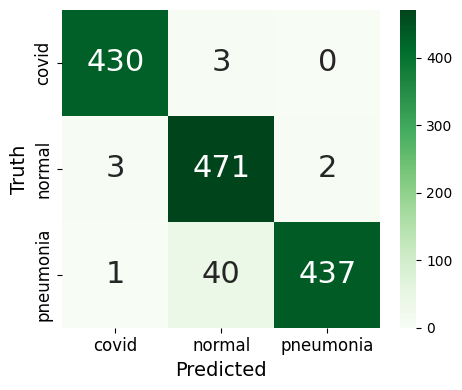

In [ ]:
test_model(0)

In [ ]:
from tqdm import tqdm

for idx in tqdm(range(len(models_data))):
    print()
    test_model(idx)

  0%|          | 0/8 [00:00<?, ?it/s]


dataset: COVID19_Pneumonia_Normal_Chest_Xray_PA_Dataset, path: /content/drive/MyDrive/Colab Notebooks/Thesis/Analysis/test_dataset/COVID19_Pneumonia_Normal_Chest_Xray_PA_Median, model path: /content/drive/MyDrive/Colab Notebooks/Thesis/Analysis/model/01_07_02_best_model_val_acc.h5, class_names: ['covid', 'normal', 'pneumonia']
Found 1387 files belonging to 3 classes.


  0%|          | 0/8 [00:16<?, ?it/s]


ValueError: Expected object to be an instance of `KerasSaveable`, but got <tf_keras.src.engine.functional.Functional object at 0x7fab018e7040> of type <class 'tf_keras.src.engine.functional.Functional'>

In [ ]:
models_k3_data =  {
    'COVID19_Pneumonia_Normal_Chest_Xray_PA_Dataset': model_root + '01_07_02_best_model_val_acc.keras',\
    'Osteoporosis Knee X-ray Dataset': model_root + '02_08_03_best_model_val_acc.keras',\
    'Chest CT-Scan images Dataset': model_root + '03_03_01_best_model_val_acc.keras',\
    'Brain Stroke CT Image Dataset': model_root + '09_07_05_best_model_val_acc.keras',\
    'Brain Tumor MRI Dataset': model_root + '04_07_01_best_model_val_acc.keras',\
    'Breast Cancer Patients MRI': model_root + '07_08_05_best_model_val_acc.keras',\
    'Ultrasound Breast Images for Breast Cancer': model_root + '05_08_01_best_model_val_acc.keras',\
    'MT_Small_Dataset': model_root + '08_08_01_best_model_val_acc.keras'
}

# test_model = tf.keras.models.load_model(models_k3_data['COVID19_Pneumonia_Normal_Chest_Xray_PA_Dataset'])
test_model = tf.keras.models.load_model('/content/drive/MyDrive/Colab Notebooks/Thesis/Analysis/model/01_07_02_best_model_val_acc.keras')
print(test_model)

ValueError: Expected object to be an instance of `KerasSaveable`, but got <tf_keras.src.engine.functional.Functional object at 0x7faa50a879a0> of type <class 'tf_keras.src.engine.functional.Functional'>

## Prediction v2

In [ ]:
import os
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image_dataset_from_directory

In [ ]:
global testsets_data
testsets_data = {
    '01_00': '/content/drive/MyDrive/Colab Notebooks/Thesis/Analysis/test_dataset/01_00',
    '01_02': '/content/drive/MyDrive/Colab Notebooks/Thesis/Analysis/test_dataset/01_02',
    '01_03': '/content/drive/MyDrive/Colab Notebooks/Thesis/Analysis/test_dataset/01_03',
    '01_04': '/content/drive/MyDrive/Colab Notebooks/Thesis/Analysis/test_dataset/01_04',
    '01_07': '/content/drive/MyDrive/Colab Notebooks/Thesis/Analysis/test_dataset/01_07',
    '01_08': '/content/drive/MyDrive/Colab Notebooks/Thesis/Analysis/test_dataset/01_08',
    '02_00': '/content/drive/MyDrive/Colab Notebooks/Thesis/Analysis/test_dataset/02_00',
    '02_02': '/content/drive/MyDrive/Colab Notebooks/Thesis/Analysis/test_dataset/02_02',
    '02_03': '/content/drive/MyDrive/Colab Notebooks/Thesis/Analysis/test_dataset/02_03',
    '02_04': '/content/drive/MyDrive/Colab Notebooks/Thesis/Analysis/test_dataset/02_04',
    '02_07': '/content/drive/MyDrive/Colab Notebooks/Thesis/Analysis/test_dataset/02_07',
    '02_08': '/content/drive/MyDrive/Colab Notebooks/Thesis/Analysis/test_dataset/02_08',
    '03_00': '/content/drive/MyDrive/Colab Notebooks/Thesis/Analysis/test_dataset/03_00',
    '03_02': '/content/drive/MyDrive/Colab Notebooks/Thesis/Analysis/test_dataset/03_02',
    '03_03': '/content/drive/MyDrive/Colab Notebooks/Thesis/Analysis/test_dataset/03_03',
    '03_04': '/content/drive/MyDrive/Colab Notebooks/Thesis/Analysis/test_dataset/03_04',
    '03_07': '/content/drive/MyDrive/Colab Notebooks/Thesis/Analysis/test_dataset/03_07',
    '03_08': '/content/drive/MyDrive/Colab Notebooks/Thesis/Analysis/test_dataset/03_08',
    '04_00': '/content/drive/MyDrive/Colab Notebooks/Thesis/Analysis/test_dataset/04_00',
    '04_02': '/content/drive/MyDrive/Colab Notebooks/Thesis/Analysis/test_dataset/04_02',
    '04_03': '/content/drive/MyDrive/Colab Notebooks/Thesis/Analysis/test_dataset/04_03',
    '04_04': '/content/drive/MyDrive/Colab Notebooks/Thesis/Analysis/test_dataset/04_04',
    '04_07': '/content/drive/MyDrive/Colab Notebooks/Thesis/Analysis/test_dataset/04_07',
    '04_08': '/content/drive/MyDrive/Colab Notebooks/Thesis/Analysis/test_dataset/04_08',
    '05_00': '/content/drive/MyDrive/Colab Notebooks/Thesis/Analysis/test_dataset/05_00',
    '05_02': '/content/drive/MyDrive/Colab Notebooks/Thesis/Analysis/test_dataset/05_02',
    '05_03': '/content/drive/MyDrive/Colab Notebooks/Thesis/Analysis/test_dataset/05_03',
    '05_04': '/content/drive/MyDrive/Colab Notebooks/Thesis/Analysis/test_dataset/05_04',
    '05_07': '/content/drive/MyDrive/Colab Notebooks/Thesis/Analysis/test_dataset/05_07',
    '05_08': '/content/drive/MyDrive/Colab Notebooks/Thesis/Analysis/test_dataset/05_08',
    '07_00': '/content/drive/MyDrive/Colab Notebooks/Thesis/Analysis/test_dataset/07_00',
    '07_02': '/content/drive/MyDrive/Colab Notebooks/Thesis/Analysis/test_dataset/07_02',
    '07_03': '/content/drive/MyDrive/Colab Notebooks/Thesis/Analysis/test_dataset/07_03',
    '07_04': '/content/drive/MyDrive/Colab Notebooks/Thesis/Analysis/test_dataset/07_04',
    '07_07': '/content/drive/MyDrive/Colab Notebooks/Thesis/Analysis/test_dataset/07_07',
    '07_08': '/content/drive/MyDrive/Colab Notebooks/Thesis/Analysis/test_dataset/07_08',
    '08_00': '/content/drive/MyDrive/Colab Notebooks/Thesis/Analysis/test_dataset/08_00',
    '08_02': '/content/drive/MyDrive/Colab Notebooks/Thesis/Analysis/test_dataset/08_02',
    '08_03': '/content/drive/MyDrive/Colab Notebooks/Thesis/Analysis/test_dataset/08_03',
    '08_04': '/content/drive/MyDrive/Colab Notebooks/Thesis/Analysis/test_dataset/08_04',
    '08_07': '/content/drive/MyDrive/Colab Notebooks/Thesis/Analysis/test_dataset/08_07',
    '08_08': '/content/drive/MyDrive/Colab Notebooks/Thesis/Analysis/test_dataset/08_08',
    '09_00': '/content/drive/MyDrive/Colab Notebooks/Thesis/Analysis/test_dataset/09_00',
    '09_02': '/content/drive/MyDrive/Colab Notebooks/Thesis/Analysis/test_dataset/09_02',
    '09_03': '/content/drive/MyDrive/Colab Notebooks/Thesis/Analysis/test_dataset/09_03',
    '09_04': '/content/drive/MyDrive/Colab Notebooks/Thesis/Analysis/test_dataset/09_04',
    '09_07': '/content/drive/MyDrive/Colab Notebooks/Thesis/Analysis/test_dataset/09_07',
    '09_08': '/content/drive/MyDrive/Colab Notebooks/Thesis/Analysis/test_dataset/09_08',
}

count = 0
for dataset_path in testsets_data:
    if not os.path.exists(testsets_data[dataset_path]):
        count += 1
        print(f"The path '{path}' does not exist.")
if count == 0:
    print('All paths are available')


All paths are available


In [ ]:
# datasets_info = [
#     {'name': '01', 'dataset_path': '/content/drive/MyDrive/Colab Notebooks/Thesis/Analysis/test_dataset/COVID19_Pneumonia_Normal_Chest_Xray_PA_Median'},
#     {'name': '02', 'dataset_path':'/content/drive/MyDrive/Colab Notebooks/Thesis/Analysis/test_dataset/Osteoporosis-Knee-Xray_unsharpMasking'},
#     {'name': '03', 'dataset_path':'/content/drive/MyDrive/Colab Notebooks/Thesis/Analysis/test_dataset/Chest-CT-Scan-images_DWT'},
#     {'name': '04', 'dataset_path':'/content/drive/MyDrive/Colab Notebooks/Thesis/Analysis/test_dataset/Brain-Tumor-MRI_Median-Mean-Hybrid_Filter'},
#     {'name': '05', 'dataset_path':'/content/drive/MyDrive/Colab Notebooks/Thesis/Analysis/test_dataset/Ultrasound-Breast-Images-for-Breast-Cancer_unsharpMasking_bilateralfilter'},
#     {'name': '07', 'dataset_path':'/content/drive/MyDrive/Colab Notebooks/Thesis/Analysis/test_dataset/Breast-Cancer-Patients-MRI_unsharpMasking_bilateralfilter'},
#     {'name': '08', 'dataset_path':'/content/drive/MyDrive/Colab Notebooks/Thesis/Analysis/test_dataset/MT-Small-Dataset_Unsharp-Masking_Bilateral_Filter'}
#     {'name': '09', 'dataset_path':'/content/drive/MyDrive/Colab Notebooks/Thesis/Analysis/test_dataset/Brain-Stroke-CT-Image-Dataset_Median-Mean-Hybrid-Filter'},
#     ]

In [ ]:
global models_data
models_data = {
    '01_00_01': '/content/drive/MyDrive/Colab Notebooks/Thesis/Model/01_00/01_00_01/best_model_val_acc.h5',
    '01_02_01': '/content/drive/MyDrive/Colab Notebooks/Thesis/Model/01_02/01_02_01/best_model_val_acc.h5',
    '01_03_01': '/content/drive/MyDrive/Colab Notebooks/Thesis/Model/01_03/01_03_01/best_model_val_acc.h5',
    '01_04_01': '/content/drive/MyDrive/Colab Notebooks/Thesis/Model/01_04/01_04_01/best_model_val_acc.h5',
    '01_07_02': '/content/drive/MyDrive/Colab Notebooks/Thesis/Model/01_07/01_07_02/best_model_val_acc.h5',
    '01_08_01': '/content/drive/MyDrive/Colab Notebooks/Thesis/Model/01_08/01_08_01/best_model_val_acc.h5',
    '02_00_03': '/content/drive/MyDrive/Colab Notebooks/Thesis/Model/02_00/02_00_03/best_model_val_acc.h5',
    '02_02_03': '/content/drive/MyDrive/Colab Notebooks/Thesis/Model/02_02/02_02_03/best_model_val_acc.h5',
    '02_03_04': '/content/drive/MyDrive/Colab Notebooks/Thesis/Model/02_03/02_03_04/best_model_val_acc.h5',
    '02_04_03': '/content/drive/MyDrive/Colab Notebooks/Thesis/Model/02_04/02_04_03/best_model_val_acc.h5',
    '02_07_03': '/content/drive/MyDrive/Colab Notebooks/Thesis/Model/02_07/02_07_03/best_model_val_acc.h5',
    '02_08_03': '/content/drive/MyDrive/Colab Notebooks/Thesis/Model/02_08/02_08_03/best_model_val_acc.h5',
    '03_00_01': '/content/drive/MyDrive/Colab Notebooks/Thesis/Model/03_00/03_00_01/best_model_val_acc.h5',
    '03_02_01': '/content/drive/MyDrive/Colab Notebooks/Thesis/Model/03_02/03_02_01/best_model_val_acc.h5',
    '03_03_01': '/content/drive/MyDrive/Colab Notebooks/Thesis/Model/03_03/03_03_01/best_model_val_acc.h5',
    '03_04_01': '/content/drive/MyDrive/Colab Notebooks/Thesis/Model/03_04/03_04_01/best_model_val_acc.h5',
    '03_07_04': '/content/drive/MyDrive/Colab Notebooks/Thesis/Model/03_07/03_07_04/best_model_val_acc.h5',
    '03_08_01': '/content/drive/MyDrive/Colab Notebooks/Thesis/Model/03_08/03_08_01/best_model_val_acc.h5',
    '04_00_01': '/content/drive/MyDrive/Colab Notebooks/Thesis/Model/04_00/04_00_01/best_model_val_acc.h5',
    '04_02_01': '/content/drive/MyDrive/Colab Notebooks/Thesis/Model/04_02/04_02_01/best_model_val_acc.h5',
    '04_03_01': '/content/drive/MyDrive/Colab Notebooks/Thesis/Model/04_03/04_03_01/best_model_val_acc.h5',
    '04_04_01': '/content/drive/MyDrive/Colab Notebooks/Thesis/Model/04_04/04_04_01/best_model_val_acc.h5',
    '04_07_01': '/content/drive/MyDrive/Colab Notebooks/Thesis/Model/04_07/04_07_01/best_model_val_acc.h5',
    '04_08_02': '/content/drive/MyDrive/Colab Notebooks/Thesis/Model/04_08/04_08_02/best_model_val_acc.h5',
    '05_00_01': '/content/drive/MyDrive/Colab Notebooks/Thesis/Model/05_00/05_00_01/best_model_val_acc.h5',
    '05_02_01': '/content/drive/MyDrive/Colab Notebooks/Thesis/Model/05_02/05_02_01/best_model_val_acc.h5',
    '05_03_01': '/content/drive/MyDrive/Colab Notebooks/Thesis/Model/05_03/05_03_01/best_model_val_acc.h5',
    '05_04_01': '/content/drive/MyDrive/Colab Notebooks/Thesis/Model/05_04/05_04_01/best_model_val_acc.h5',
    '05_07_01': '/content/drive/MyDrive/Colab Notebooks/Thesis/Model/05_07/05_07_01/best_model_val_acc.h5',
    '05_08_01': '/content/drive/MyDrive/Colab Notebooks/Thesis/Model/05_08/05_08_01/best_model_val_acc.h5',
    '07_00_02': '/content/drive/MyDrive/Colab Notebooks/Thesis/Model/07_00/07_00_02/best_model_val_acc.h5',
    '07_02_05': '/content/drive/MyDrive/Colab Notebooks/Thesis/Model/07_02/07_02_05/best_model_val_acc.h5',
    '07_03_05': '/content/drive/MyDrive/Colab Notebooks/Thesis/Model/07_03/07_03_05/best_model_val_acc.h5',
    '07_04_01': '/content/drive/MyDrive/Colab Notebooks/Thesis/Model/07_04/07_04_01/best_model_val_acc.h5',
    '07_07_01': '/content/drive/MyDrive/Colab Notebooks/Thesis/Model/07_07/07_07_01/best_model_val_acc.h5',
    '07_08_05': '/content/drive/MyDrive/Colab Notebooks/Thesis/Model/07_08/07_08_05/best_model_val_acc.h5',
    '08_00_01': '/content/drive/MyDrive/Colab Notebooks/Thesis/Model/08_00/08_00_01/best_model_val_acc.h5',
    '08_02_01': '/content/drive/MyDrive/Colab Notebooks/Thesis/Model/08_02/08_02_01/best_model_val_acc.h5',
    '08_03_01': '/content/drive/MyDrive/Colab Notebooks/Thesis/Model/08_03/08_03_01/best_model_val_acc.h5',
    '08_04_01': '/content/drive/MyDrive/Colab Notebooks/Thesis/Model/08_04/08_04_01/best_model_val_acc.h5',
    '08_07_04': '/content/drive/MyDrive/Colab Notebooks/Thesis/Model/08_07/08_07_04/best_model_val_acc.h5',
    '08_08_01': '/content/drive/MyDrive/Colab Notebooks/Thesis/Model/08_08/08_08_01/best_model_val_acc.h5',
    '09_00_05': '/content/drive/MyDrive/Colab Notebooks/Thesis/Model/09_00/09_00_05/best_model_val_acc.h5',
    '09_02_05': '/content/drive/MyDrive/Colab Notebooks/Thesis/Model/09_02/09_02_05/best_model_val_acc.h5',
    '09_03_05': '/content/drive/MyDrive/Colab Notebooks/Thesis/Model/09_03/09_03_05/best_model_val_acc.h5',
    '09_04_01': '/content/drive/MyDrive/Colab Notebooks/Thesis/Model/09_04/09_04_01/best_model_val_acc.h5',
    '09_07_05': '/content/drive/MyDrive/Colab Notebooks/Thesis/Model/09_07/09_07_05/best_model_val_acc.h5',
    '09_08_05': '/content/drive/MyDrive/Colab Notebooks/Thesis/Model/09_08/09_08_05/best_model_val_acc.h5',
}

count = 0
for key in models_data:
    if not os.path.exists(models_data[key]):
        count += 1
        print(f"The path '{models_data[key]}' does not exist.")
if count == 0:
        print('All paths are available')

All paths are available


In [ ]:
global main_path, testsets, preprocessing, models, class_names_list
main_path = "/content/drive/MyDrive/Colab Notebooks/Thesis/Analysis"
testsets = ['03', '04', '05', '07', '08', '09'] # '01', '02', '03', '04', '05', '07', '08', '09'
preprocessings = ['00', '02', '03', '04', '07', '08']
models = ['01', '02', '03', '04', '05']

# # Sample
testsets = ['09']
preprocessings = ['03','08']
models = ['05']


class_names_list = {
    '01': ['covid', 'normal', 'pneumonia'],
    '02': ['normal', 'osteoporosis'],
    '03': ['adenocarcinoma', 'large.cell.carcinoma', 'normal', 'squamous.cell.carcinoma'], # 'adenocar-\ncinoma', 'large.cell.\ncarcinoma', 'normal', 'squamous.cell.\ncarcinoma'
    '04': ['glioma', 'meningioma', 'notumor', 'pituitary'],
    '05': ['benign', 'malignant'],
    '07': ['Healthy', 'Sick'],
    '08': ['Benign', 'Malignant'],
    '09': ['Normal', 'Stroke']
}

### CM

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns
import pickle
import textwrap

def wrap_labels(labels, width):
    return [textwrap.fill(label, width) for label in labels]

def calCM(y_true, y_pred, class_names, savefig_name):
    global main_path
    savepath = main_path + '/figures/'

    # Calculate the confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    num_classes = len(class_names)
    with open(savepath + f'cm_{savefig_name}.pkl', 'wb') as f:
        pickle.dump({'cm': cm, 'class_names': class_names}, f)

    # Set default fontsize
    default_number_fontsize = 14
    default_label_fontsize = 9 # 12
    default_tick_fontsize = 9 # 10

    # Wrap class names to fit within the cell width
    wrapped_class_names = wrap_labels(class_names, width=10)

    # Adjust fontsize based on the number of classes
    if num_classes == 2:
        number_fontsize = default_number_fontsize + 8 # 16
        label_fontsize = default_label_fontsize # 6
        tick_fontsize = default_tick_fontsize # 4
    elif num_classes == 3:
        number_fontsize = default_number_fontsize + 4 # 12
        label_fontsize = default_label_fontsize # 4
        tick_fontsize = default_tick_fontsize # 2
    elif num_classes == 4:
        number_fontsize = default_number_fontsize + 2 # 8
        label_fontsize = default_label_fontsize # 2
        tick_fontsize = default_tick_fontsize # 1
    elif num_classes == 5:
        number_fontsize = default_number_fontsize + 0 # 4
        label_fontsize = default_label_fontsize # 1
        tick_fontsize = default_tick_fontsize # 0
    else:
        number_fontsize = default_number_fontsize
        label_fontsize = default_label_fontsize
        tick_fontsize = default_tick_fontsize

    isLong = False
    for i in range(len(class_names)):
        print(len(class_names[i]))
        if len(class_names[i]) > 15:
            isLong = True
            break

    # Draw the confusion matrix
    plt.figure(figsize=(4.8, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Greens', xticklabels=class_names, yticklabels=class_names, annot_kws={"size": number_fontsize})
    plt.xlabel('Predicted') # fontsize=label_fontsize
    plt.ylabel('Truth') # fontsize=label_fontsize
    plt.xticks(rotation = 0, fontsize = 8 if isLong else tick_fontsize) # rotation = 90 if isLong else 0
    plt.yticks(fontsize = 8 if isLong else tick_fontsize)

    plt.tight_layout()
    plt.savefig(f'{savepath}cm_{savefig_name}.png', format='png', dpi=400)
    plt.savefig(f'{savepath}cm_{savefig_name}.svg', format='svg')
    plt.show()

class_name 0 length: 8
class_name 1 length: 6


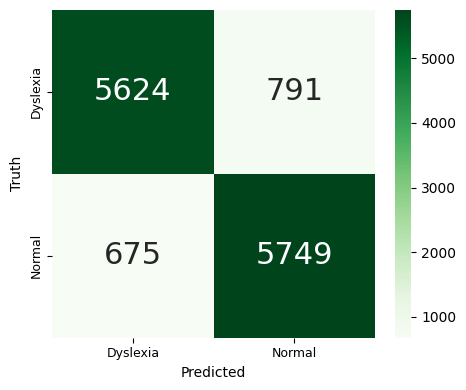

In [ ]:
# Draw single CM
import os
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns


savepath = '/content/drive/MyDrive/Colab Notebooks/temp/'

# Calculate the confusion matrix
cm = [[5624, 791],
      [675, 5749]]
class_names = ['Dyslexia', 'Normal']
num_classes = len(class_names)
with open(savepath + f'cm_temp.pkl', 'wb') as f:
    pickle.dump({'cm': cm, 'class_names': class_names}, f)

# Set default fontsize
default_number_fontsize = 14
default_label_fontsize = 9 # 12
default_tick_fontsize = 9 # 10

# Wrap class names to fit within the cell width
wrapped_class_names = wrap_labels(class_names, width=10)

# Adjust fontsize based on the number of classes
if num_classes == 2:
    number_fontsize = default_number_fontsize + 8 # 16
    label_fontsize = default_label_fontsize # 6
    tick_fontsize = default_tick_fontsize # 4
elif num_classes == 3:
    number_fontsize = default_number_fontsize + 4 # 12
    label_fontsize = default_label_fontsize # 4
    tick_fontsize = default_tick_fontsize # 2
elif num_classes == 4:
    number_fontsize = default_number_fontsize + 2 # 8
    label_fontsize = default_label_fontsize # 2
    tick_fontsize = default_tick_fontsize # 1
elif num_classes == 5:
    number_fontsize = default_number_fontsize + 0 # 4
    label_fontsize = default_label_fontsize # 1
    tick_fontsize = default_tick_fontsize # 0
else:
    number_fontsize = default_number_fontsize
    label_fontsize = default_label_fontsize
    tick_fontsize = default_tick_fontsize

isLong = False
for i in range(len(class_names)):
    print(f'class_name {i} length:', len(class_names[i]))
    if len(class_names[i]) > 15:
        isLong = True
        break

# Draw the confusion matrix
plt.figure(figsize=(4.8, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens', xticklabels=class_names, yticklabels=class_names, annot_kws={"size": number_fontsize})
plt.xlabel('Predicted') # fontsize=label_fontsize
plt.ylabel('Truth') # fontsize=label_fontsize
plt.xticks(rotation = 0, fontsize = 8 if isLong else tick_fontsize) # rotation = 90 if isLong else 0
plt.yticks(fontsize = 8 if isLong else tick_fontsize)

plt.tight_layout()
plt.savefig(f'{savepath}cm_temp.png', format='png', dpi=400)
plt.savefig(f'{savepath}cm_temp.svg', format='svg')
plt.show()

5
6
9


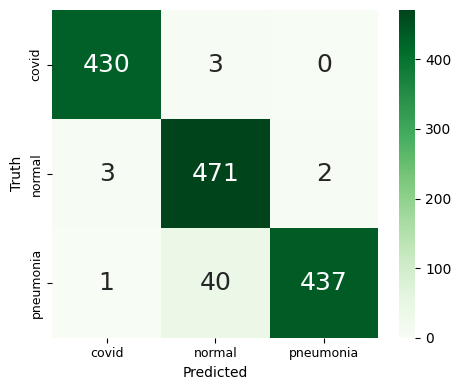

6
12


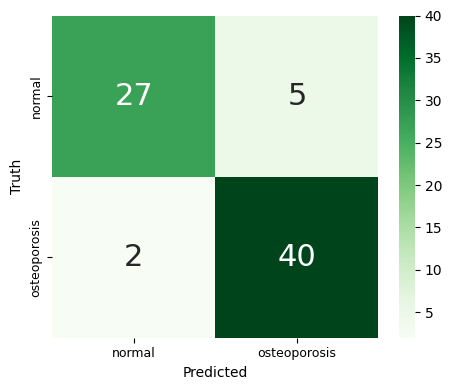

16


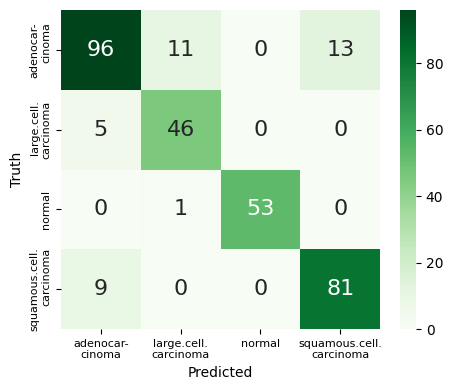

6
10
7
9


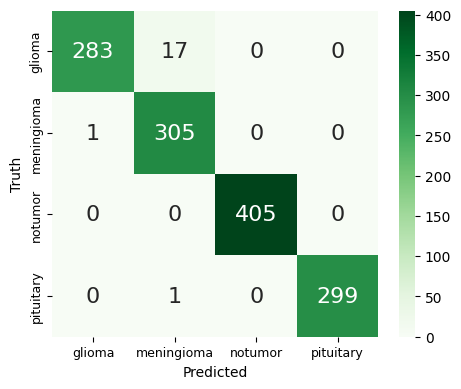

6
9


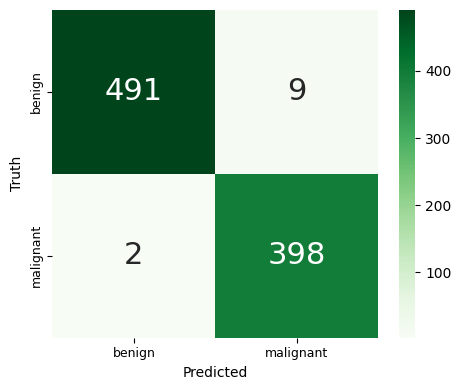

7
4


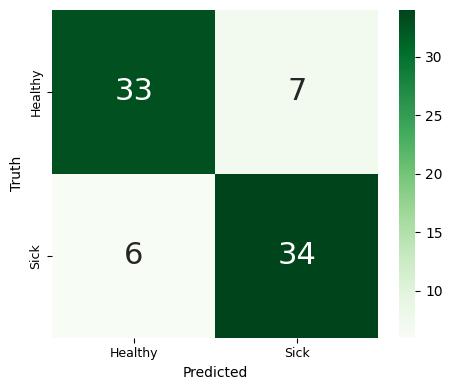

6
9


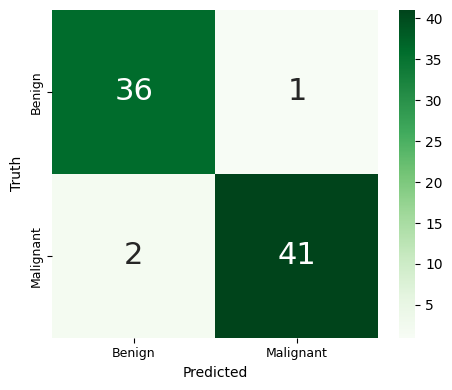

6
6


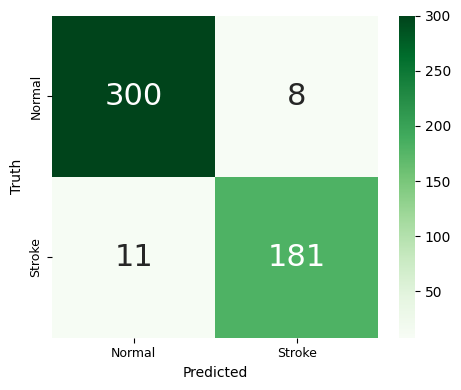

In [ ]:
# Draw multiple CMs
import os

label_path = '/content/drive/MyDrive/Colab Notebooks/Thesis/Analysis/prediction'
labels = [
    '01_07_02.pkl',
    '02_08_03.pkl',
    '03_03_01.pkl',
    '04_07_01.pkl',
    '05_08_01.pkl',
    '07_08_05.pkl',
    '08_08_01.pkl',
    '09_07_05.pkl'
]

for label in labels:
    with open(os.path.join(label_path, label), 'rb') as f:
        data = pickle.load(f)
        y_true = data['actual']
        y_pred = data['pred']
        savefig_name, _ = os.path.splitext(label)
        class_names = class_names_list[savefig_name.split('_')[0]]
        if class_names[0] == 'adenocarcinoma':
            class_names = ['adenocar-\ncinoma', 'large.cell.\ncarcinoma', 'normal', 'squamous.cell.\ncarcinoma']
    calCM(y_true, y_pred, class_names, savefig_name)

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns
import pickle
import textwrap

def wrap_labels(labels, width):
    return [textwrap.fill(label, width) for label in labels]

def drawCM(cm, class_names):
    # savepath = path + '/figures/'

    # Calculate the confusion matrix
    # cm = confusion_matrix(y_true, y_pred)
    num_classes = len(class_names)
    # with open(savepath + f'cm_{savefig_name}.pkl', 'wb') as f:
    #     pickle.dump({'cm': cm, 'class_names': class_names}, f)

    # Set default fontsize
    default_number_fontsize = 16
    default_label_fontsize = 10 # 12
    default_tick_fontsize = 9 # 10

    # Wrap class names to fit within the cell width
    wrapped_class_names = wrap_labels(class_names, width=10)

    # Adjust fontsize based on the number of classes
    if num_classes == 2:
        number_fontsize = default_number_fontsize + 8 # 16
        label_fontsize = default_label_fontsize # 6
        tick_fontsize = default_tick_fontsize # 4
    elif num_classes == 3:
        number_fontsize = default_number_fontsize + 4 # 12
        label_fontsize = default_label_fontsize # 4
        tick_fontsize = default_tick_fontsize # 2
    elif num_classes == 4:
        number_fontsize = default_number_fontsize + 2 # 8
        label_fontsize = default_label_fontsize # 2
        tick_fontsize = default_tick_fontsize # 1
    elif num_classes == 5:
        number_fontsize = default_number_fontsize # 4
        label_fontsize = default_label_fontsize # 1
        tick_fontsize = default_tick_fontsize # 0
    else:
        number_fontsize = default_number_fontsize
        label_fontsize = default_label_fontsize
        tick_fontsize = default_tick_fontsize

    isLong = False
    for i in range(len(class_names)):
        print(len(class_names[i]))
        if len(class_names[i]) > 15:
            isLong = True
            break

    # Draw the confusion matrix
    plt.figure(figsize=(4.8, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Greens', xticklabels=class_names, yticklabels=class_names, annot_kws={"size": number_fontsize})
    plt.xlabel('Predicted') # fontsize=label_fontsize
    plt.ylabel('Truth') # fontsize=label_fontsize
    plt.xticks(rotation = 0, fontsize = 8 if isLong else tick_fontsize) # rotation = 90 if isLong else 0
    plt.yticks(fontsize = 8 if isLong else tick_fontsize)

    plt.tight_layout()
    # plt.savefig(f'{savepath}cm_{savefig_name}.png', format='png', dpi=400)
    # plt.savefig(f'{savepath}cm_{savefig_name}.svg', format='svg')
    plt.show()

[[96 11  0 13]
 [ 5 46  0  0]
 [ 0  1 53  0]
 [ 9  0  0 81]]
['adenocar-\ncinoma', 'large.cell.\ncarcinoma', 'normal', 'squamous.cell.\ncarcinoma']
16


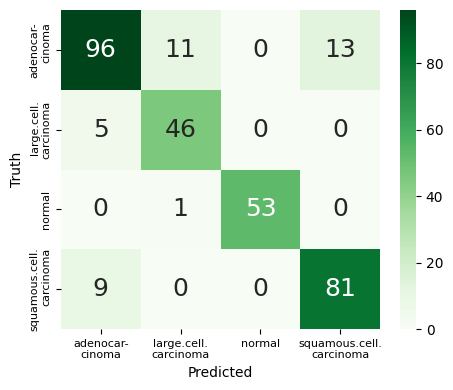

In [ ]:
import pickle

with open('/content/drive/MyDrive/Colab Notebooks/Thesis/Analysis/figures/cm_Chest CT-Scan images Dataset.pkl', 'rb') as f:
# with open('/content/drive/MyDrive/Colab Notebooks/Thesis/Analysis/figures/cm_Brain Tumor MRI Dataset.pkl', 'rb') as f:
# with open('/content/drive/MyDrive/Colab Notebooks/Thesis/Analysis/figures/cm_Brain Stroke CT Image Dataset.pkl', 'rb') as f:
# with open('/content/drive/MyDrive/Colab Notebooks/Thesis/Analysis/figures/cm_COVID19_Pneumonia_Normal_Chest_Xray_PA_Dataset.pkl', 'rb') as f:
    data = pickle.load(f)

cm, class_names = data['cm'], data['class_names']
class_names = ['adenocar-\ncinoma', 'large.cell.\ncarcinoma', 'normal', 'squamous.cell.\ncarcinoma']
print(cm)
print(class_names)
drawCM(cm, class_names)

### Prediction

In [ ]:
# Function to rename layers
def rename_layers(model):
    for layer in model.layers:
        if '/' in layer.name:
            layer._name = layer.name.replace('/', '_')
    return model

In [ ]:
import tensorflow as tf
import tf_keras # Keras 2
from tf_keras.optimizers import Adam
import pickle
from sklearn.metrics import precision_recall_fscore_support, cohen_kappa_score, accuracy_score


global color_mode, label_mode, batch_size
batch_size = 32
color_mode = 'rgb'
label_mode = "categorical"

def buildTestset(testset_no, preprocessing_no, model_no):
    # global main_path, testsets_data, models_data, class_names_list, batch_size, color_mode, label_mode
    dat_mtd = testset_no + '_' + preprocessing_no
    dat_mtd_model = dat_mtd + '_' + model_no
    testset_path = testsets_data[dat_mtd]

    try:
        model_path = models_data[dat_mtd_model]
    except:
        print(f'Model {dat_mtd_model} does not exist')
        return

    class_names = class_names_list[testset_no]
    print(f'dataset: {dat_mtd}, path: {testset_path}, model path: {model_path}, class_names: {class_names}')
    if model_no == '01':
        image_size = (380, 380)
    else:
        image_size = (224, 224)
    testset = image_dataset_from_directory(
        directory= testset_path,
        labels="inferred",
        label_mode=label_mode,
        class_names=class_names,
        color_mode=color_mode,
        batch_size=batch_size,
        image_size=image_size,
        shuffle=False,
        # seed=42,
        # validation_split=0.2,
        # subset="validation",
        interpolation="bilinear",
        # follow_links=False,
        # crop_to_aspect_ratio=False,
        # data_format=None,
    )

    num_classes = len(class_names)
    print("Class names:", testset.class_names)
    print("Number of classes: ", num_classes)

    return testset, model_path, dat_mtd_model

def predict(testset, model_path, dat_mtd_model):
    filepaths = testset.file_paths
    # df_results['filepath'] = filepath

    # Take actual label. Với argmax tìm giá trị lớn nhất dọc trục cuối cung2 (trục lớp) của mỗi mẫu.
    # actuals = []
    # for img, label in testset:
    #     # actuals += np.array(np.argmax(label, axis=-1)).flatten().tolist()
    #     actuals.extend(np.argmax(label, axis=-1).tolist())
    actuals = np.concatenate([np.argmax(label, axis=-1).flatten() for img, label in testset]).tolist()
    # df_results['actual'] = actual

    # Load the model
    _, extension = os.path.splitext(model_path)
    if extension == '.h5':
        model = tf_keras.models.load_model(model_path, custom_objects={'Adam': Adam}) # keras 2
    elif extension == '.keras':
        model = load_model(model_path) # keras 3


    # Make prediction
    preds = []
    for img, label in testset:
        prediction = model.predict(img)
        if len(testset.class_names) == 2:
            preds += [1 if i > 0.5 else 0 for i in prediction]
        else:
            preds += np.argmax(prediction, axis=-1).tolist()

    # Calculate accuracy
    accuracy = accuracy_score(actuals, preds)
    # Calculate precision, recall, and F1 score in macro average
    precision, recall, f1_score, _ = precision_recall_fscore_support(actuals, preds, average='macro')
    # Calculate Cohen's Kappa. Weight: 'linear' khi khác biệt giữa các lớp là tuyến tính; 'quadratic' nếu khác biệt các lớp là phi tuyến tính.
    kappa = cohen_kappa_score(actuals, preds)

    with open(f'{main_path}/prediction/{dat_mtd_model}.pkl', 'wb') as f:
        pickle.dump({'filepath': filepaths, 'actual': actuals, 'pred': preds}, f)

    print(f'combination: {dat_mtd_model}, filepath: {len(filepaths)}, actual: {len(actuals)}, pred: {len(preds)}')
    print(f'accuracy: {accuracy}, precision: {precision}, recall: {recall}, f1_score: {f1_score}, kappa: {kappa}')

    # calCM(actuals, preds, class_names, dat_mtd_model)

    return dat_mtd_model, accuracy, precision, recall, f1_score, kappa

# results_df = pd.DataFrame(columns=['combination', 'accuracy', 'precision', 'recall', 'f1_score', 'kappa'])
# recover
results_df = pd.read_csv(f'{main_path}/results.csv')

for testset_no in testsets:
    for preprocessing_no in preprocessings:
        for model_no in models:
            result = buildTestset(testset_no, preprocessing_no, model_no)
            if result is not None:
                testset, model_path, dat_mtd_model = result
            else:
                continue

            result = predict(testset, model_path, dat_mtd_model)
            if result is not None:
                dat_mtd_model, accuracy, precision, recall, f1_score, kappa = result
                result_df = pd.DataFrame([{
                    'combination': dat_mtd_model,
                    'accuracy': accuracy,
                    'precision': precision,
                    'recall': recall,
                    'f1_score': f1_score,
                    'kappa': kappa
                }])

                results_df = pd.concat([results_df, result_df], ignore_index=True)
                results_df.to_csv(f'{main_path}/results.csv', index=False)


display(results_df)
# results_df.to_csv(f'{main_path}/results.csv', index=False)


dataset: 09_03, path: /content/drive/MyDrive/Colab Notebooks/Thesis/Analysis/test_dataset/09_03, model path: /content/drive/MyDrive/Colab Notebooks/Thesis/Model/09_03/09_03_05/best_model_val_acc.h5, class_names: ['Normal', 'Stroke']
Found 500 files belonging to 2 classes.
Class names: ['Normal', 'Stroke']
Number of classes:  2
1/1 [==============================] - 1s 1s/step
combination: 09_03_05, filepath: 500, actual: 500, pred: 500
accuracy: 0.952, precision: 0.9552083333333333, recall: 0.9433847402597403, f1_score: 0.9486336552290939, kappa: 0.8973305954825462
dataset: 09_08, path: /content/drive/MyDrive/Colab Notebooks/Thesis/Analysis/test_dataset/09_08, model path: /content/drive/MyDrive/Colab Notebooks/Thesis/Model/09_08/09_08_05/best_model_val_acc.h5, class_names: ['Normal', 'Stroke']
Found 500 files belonging to 2 classes.
Class names: ['Normal', 'Stroke']
Number of classes:  2
1/1 [==============================] - 1s 1s/step
combination: 09_08_05, filepath: 500, actual: 500

,combination,accuracy,precision,recall,f1_score,kappa
0,01_00_01,0.963230,0.965934,0.963980,0.964126,0.944787
1,01_02_01,0.957462,0.961267,0.958114,0.958508,0.936115
2,01_03_01,0.963951,0.966983,0.964686,0.964798,0.945870
3,01_04_01,0.959625,0.962635,0.960348,0.960561,0.939370
4,01_07_02,0.964672,0.967523,0.965598,0.965516,0.946959
5,01_08_01,0.963230,0.965744,0.964052,0.964040,0.944792
6,02_00_03,0.878378,0.877344,0.874256,0.875630,0.751307
7,02_02_03,0.891892,0.889881,0.889881,0.889881,0.779762
8,02_03_04,0.864865,0.862351,0.862351,0.862351,0.724702
9,02_04_03,0.864865,0.865152,0.858631,0.861215,0.722639


In [ ]:
with open(f'{main_path}/prediction/08_07_04.pkl', 'rb') as f:
    result = pickle.load(f)
    print(result)

{'filepath': ['/content/drive/MyDrive/Colab Notebooks/Thesis/Analysis/test_dataset/08_07/Benign/benign_Adjusted (10).jpg', '/content/drive/MyDrive/Colab Notebooks/Thesis/Analysis/test_dataset/08_07/Benign/benign_Adjusted (110).jpg', '/content/drive/MyDrive/Colab Notebooks/Thesis/Analysis/test_dataset/08_07/Benign/benign_Adjusted (117).jpg', '/content/drive/MyDrive/Colab Notebooks/Thesis/Analysis/test_dataset/08_07/Benign/benign_Adjusted (118).jpg', '/content/drive/MyDrive/Colab Notebooks/Thesis/Analysis/test_dataset/08_07/Benign/benign_Adjusted (13).jpg', '/content/drive/MyDrive/Colab Notebooks/Thesis/Analysis/test_dataset/08_07/Benign/benign_Adjusted (138).jpg', '/content/drive/MyDrive/Colab Notebooks/Thesis/Analysis/test_dataset/08_07/Benign/benign_Adjusted (142).jpg', '/content/drive/MyDrive/Colab Notebooks/Thesis/Analysis/test_dataset/08_07/Benign/benign_Adjusted (143).jpg', '/content/drive/MyDrive/Colab Notebooks/Thesis/Analysis/test_dataset/08_07/Benign/benign_Adjusted (144).jpg'

## **An image prediction**

In [6]:
import os
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image_dataset_from_directory
from tensorflow.keras.utils import img_to_array, load_img
import tf_keras # keras 2


In [8]:
model = tf_keras.models.load_model('/content/drive/MyDrive/Colab Notebooks/Thesis/Model/09_07/09_07_05/best_model_val_acc.h5') # brain-ct - mobilenet
img = load_img(
            '/content/drive/MyDrive/Colab Notebooks/Thesis/Analysis/test_dataset/Brain-Stroke-CT-Image-Dataset_Median-Mean-Hybrid-Filter/Stroke/88 (16).jpg',
            target_size = (224, 224),
            # target_size = (380, 380),
            color_mode = 'rgb',
            interpolation = 'bilinear'
        )
img = np.expand_dims(img, axis=0)
prediction = model.predict(img)
print(prediction)


1/1 [==============================] - 2s 2s/step
[[0.27553144]]
